<a href="https://colab.research.google.com/github/hturroserrano/hypertension_data_nashville/blob/main/hypertension_survey_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#scaler = sklearn.preprocessing.StandardScaler()

In [ ]:
surveyurl = 'https://raw.githubusercontent.com/CDavisBelmont/SurveyData/main/health_surv_ques.csv'

In [ ]:
df = pd.read_csv(surveyurl)

In [ ]:
df

Unnamed: 0        Zone  CaseID Vlanguage  TYPE_QX DEVICE_SPECIFY  \
0              0        West  100036   English        1            NaN   
1              1  South East  100072   English        1            NaN   
2              2  South East  101071   English        1            NaN   
3              3  South East  103738   English        1            NaN   
4              4  South East  103752   English        1            NaN   
...          ...         ...     ...       ...      ...            ...   
1800        1800  South East  108538   English        1            NaN   
1801        1801  South East  101054   English        1            NaN   
1802        1802  South East  108724   English        1            NaN   
1803        1803  South East  101453   English        2            NaN   
1804        1804        East  102249   English        1            NaN   

      DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
0        NaN            2          NaN          NaN  ...   
1        NaN            1          NaN          NaN  ...   
2        1.0            1          1.0          1.0  ...   
3        NaN            2          NaN          NaN  ...   
4        NaN            3          NaN          NaN  ...   
...      ...          ...          ...          ...  ...   
1800     4.0            2          1.0          0.0  ...   
1801     4.0            1          1.0          1.0  ...   
1802     4.0            1          1.0          1.0  ...   
1803     NaN            2          NaN          NaN  ...   
1804     4.0            2          1.0          0.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
0                                                   1.0                                                                                                                                           
1                                                   1.0                                                                                                                                           
2                                                   1.0                                                                                                                                           
3                                                   1.0                                                                                                                                           
4                                                   4.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1800                                                1.0                                                                                                                                           
1801                                                1.0                                                                                                                                           
1802                                                1.0                                                                                                                                           
1803                                                1.0                                                                                                                                           
1804                                                5.0                                                                                                                                           

      Other than cost), have you delayed getting needed

In [ ]:
for i, col in enumerate(df.columns):
  if "Hispanic" in col:
    print(i)
    print(col)

43
Which of the following Hispanic, Latino/a or Spanish origin groups represents you? (Please check all that apply.). Please specify
44
Which of the following Hispanic, Latino/a or Spanish origin groups represents you? (Please check all that apply.). Other Hispanic, Latino/a, or Spanish origin
45
Which of the following Hispanic, Latino/a or Spanish origin groups represents you? (Please check all that apply.). Cuban
46
Which of the following Hispanic, Latino/a or Spanish origin groups represents you? (Please check all that apply.). Puerto Rican
47
Which of the following Hispanic, Latino/a or Spanish origin groups represents you? (Please check all that apply.). Mexican, Mexican American, Chicano/a
48
Are you Hispanic, Latino/a, or Spanish origin?


In [ ]:
hispanic_hyp = df.columns[48]

In [ ]:
hispanic_df = df[df[hispanic_hyp]== 1]

In [ ]:
hispanic_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
6              6                    East  104121   English        1   
26            26              South West  109703   English        1   
194          194                   North  108210   English        1   
212          212              South East  100199   Spanish        1   
226          226              South East  102100   English        2   
...          ...                     ...     ...       ...      ...   
1791        1791              South East  106839   English        2   
1792        1792  Nashville Promise Zone  107302   Spanish        1   
1800        1800              South East  108538   English        1   
1801        1801              South East  101054   English        1   
1804        1804                    East  102249   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
6               NaN     4.0            1          0.0          1.0  ...   
26              NaN     4.0            3          0.0          0.0  ...   
194             NaN     1.0            3          1.0          1.0  ...   
212             NaN     4.0            1          1.0          1.0  ...   
226             NaN     NaN            1          NaN          NaN  ...   
...             ...     ...          ...          ...          ...  ...   
1791            NaN     NaN            1          NaN          NaN  ...   
1792            NaN     2.0            1          0.0          1.0  ...   
1800            NaN     4.0            2          1.0          0.0  ...   
1801            NaN     4.0            1          1.0          1.0  ...   
1804            NaN     4.0            2          1.0          0.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
6                                                   5.0                                                                                                                                           
26                                                  1.0                                                                                                                                           
194                                                 1.0                                                                                                                                           
212                                                 2.0                                                                                                                                           
226                                                 1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1791                                                2.0                                                                                                                                           
1792                                                1.0                                                                                                                                           
1800                                                1.0                                                                                                                                           
1801                                                1.0                                                                                                                                           
1804                                                5.0                                                    

In [ ]:
#sns.scatterplot(x='', y= '',
                #hue='', data=hispanic_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "White" in col:
    print(i)
    print(col)

42
Which of the following groups would you say represents your race? (Please check all that apply.)   White


In [ ]:
white_hyp = df.columns[42]

In [ ]:
white_df = df[df[white_hyp]== 1]

In [ ]:
white_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
6              6                    East  104121   English        1   
8              8              South East  104271   English        2   
12            12                    East  105824   English        2   
13            13              South East  105921   English        1   
26            26              South West  109703   English        1   
...          ...                     ...     ...       ...      ...   
1795        1795                    East  110092   English        1   
1796        1796  Nashville Promise Zone  111117   English        2   
1799        1799              South East  106738   English        2   
1800        1800              South East  108538   English        1   
1802        1802              South East  108724   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
6               NaN     4.0            1          0.0          1.0  ...   
8               NaN     NaN            1          NaN          NaN  ...   
12              NaN     NaN            2          NaN          NaN  ...   
13              NaN     2.0            1          0.0          0.0  ...   
26              NaN     4.0            3          0.0          0.0  ...   
...             ...     ...          ...          ...          ...  ...   
1795            NaN     2.0            1          1.0          1.0  ...   
1796            NaN     NaN            2          NaN          NaN  ...   
1799            NaN     NaN            3          NaN          NaN  ...   
1800            NaN     4.0            2          1.0          0.0  ...   
1802            NaN     4.0            1          1.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
6                                                   5.0                                                                                                                                           
8                                                   1.0                                                                                                                                           
12                                                  2.0                                                                                                                                           
13                                                  1.0                                                                                                                                           
26                                                  1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1795                                                1.0                                                                                                                                           
1796                                                1.0                                                                                                                                           
1799                                                2.0                                                                                                                                           
1800                                                1.0                                                                                                                                           
1802                                                1.0                                                    

In [ ]:
#sns.scatterplot(x=' ', y=' ',
                #hue='Zone', data=white_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "Black" in col:
    print(i)
    print(col)

41
Which of the following groups would you say represents your race? (Please check all that apply.)   Black or African American


In [ ]:
black_hyp = df.columns[41]

In [ ]:
black_df = df[df[black_hyp]== 1]
black_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
7              7                   North  104179   English        1   
53            53  Nashville Promise Zone  100667   English        2   
66            66                    West  111532   English        2   
69            69                   North  101203   English        2   
71            71  Nashville Promise Zone  102518   English        1   
...          ...                     ...     ...       ...      ...   
1783        1783              South West  110353   English        1   
1786        1786  Nashville Promise Zone  111275   English        1   
1797        1797                    East  100243   English        1   
1798        1798  Nashville Promise Zone  100735   English        1   
1803        1803              South East  101453   English        2   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
7               NaN     1.0            2          1.0          1.0  ...   
53              NaN     NaN            2          NaN          NaN  ...   
66              NaN     NaN            2          NaN          NaN  ...   
69              NaN     NaN            2          NaN          NaN  ...   
71              NaN     1.0            2          1.0          1.0  ...   
...             ...     ...          ...          ...          ...  ...   
1783            NaN     4.0           SW          0.0          1.0  ...   
1786            NaN     4.0            1          1.0          1.0  ...   
1797            NaN     4.0            2          1.0          1.0  ...   
1798            NaN     4.0            1          0.0          1.0  ...   
1803            NaN     NaN            2          NaN          NaN  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
7                                                   1.0                                                                                                                                           
53                                                  1.0                                                                                                                                           
66                                                  1.0                                                                                                                                           
69                                                  1.0                                                                                                                                           
71                                                  1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1783                                                1.0                                                                                                                                           
1786                                                3.0                                                                                                                                           
1797                                                2.0                                                                                                                                           
1798                                                2.0                                                                                                                                           
1803                                                1.0                                                    

In [ ]:
#sns.scatterplot(x='What is the ZIP Code where you currently live?', y='DEVICE',
                #hue='Zone', data=black_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "Asian" in col:
    print(i)
    print(col)

28
Which of the following Asian groups represents you?   (Please check all that apply). (Please specify)
29
Which of the following Asian groups represents you?   (Please check all that apply). Other Asian
30
Which of the following Asian groups represents you?   (Please check all that apply). Vietnamese
31
Which of the following Asian groups represents you?   (Please check all that apply). Korean
32
Which of the following Asian groups represents you?   (Please check all that apply)Japanese
33
Which of the following Asian groups represents you?   (Please check all that apply). Filipino
34
Which of the following Asian groups represents you?   (Please check all that apply). Chinese
35
Which of the following Asian groups represents you?   (Please check all that apply). Asian Indian
40
Which of the following groups would you say represents your race? (Please check all that apply.) Asian (go to #116


In [ ]:
asian_hyp = df.columns[40]

In [ ]:
asian_df = df[df[asian_hyp]== 1]
asian_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
85            85              South East  105988   English        2   
117          117  Nashville Promise Zone  110594   English        1   
140          140              South West  100352   English        2   
271          271  Nashville Promise Zone  101318   English        1   
288          288              South West  110602   English        2   
312          312                    East  106469   English        1   
361          361              South East  109626   English        2   
384          384              South East  101523   English        2   
414          414              South East  102396   English        1   
457          457                    East  110756   English        1   
462          462              South East  107280   English        1   
463          463  Nashville Promise Zone  107284   English        1   
524          524  Nashville Promise Zone  103705   English        1   
530          530              South East  112130   English        1   
552          552              South West  102891   English        1   
559          559                    East  107638   English        1   
563          563              South West  111349   English        1   
589          589              South East  105909   English        1   
610          610                    East  109199   English        1   
623          623              South West  105524   English        1   
630          630              South East  111854   English        1   
638          638              South West  108504   English        1   
679          679              South East  110486   English        1   
715          715              South East  106545   English        1   
718          718              South West  100766   English        1   
732          732              South East  110986   English        2   
768          768  Nashville Promise Zone  109858   English        2   
1203        1203              South West  109312   English        1   
1214        1214                   North  105387   English        1   
1265        1265              South East  110006   English        1   
1300        1300                    West  104437   English        1   
1322        1322              South East  110234   English        1   
1360        1360              South East  106893   English        1   
1389        1389                    East  105301   English        2   
1394        1394                    East  108413   English        1   
1427        1427              South East  109810   English        1   
1454        1454                   North  112060   English        1   
1467        1467                    East  110100   English        1   
1483        1483              South East  110917   English        1   
1664        1664              South West  104689   English        1   
1673        1673  Nashville Promise Zone  108267   English        1   
1713        1713  Nashville Promise Zone  102071   English        1   
1717        1717                    West  105303   English        1   
1742        1742              South West  106371   English        2   
1743        1743              South East  106647   English        1   
1767        1767              South West  105987   English        2   
1779        1779                    West  103805   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
85              NaN     NaN            1          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
140             NaN     NaN           SW          NaN          NaN  ...   
271             NaN     2.0            1          1.0          1.0  ...   
288             NaN     NaN            3          NaN          NaN  ...   
312             NaN     2.0            3          1.0          1.0  ...   
361             NaN     NaN            1          NaN          NaN  ... 

In [ ]:
#sns.scatterplot(x='', y='',
                #hue='Zone', data=asian_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "Native Hawaiian" in col:
    print(i)
    print(col)

39
Which of the following groups would you say represents your race? (Please check all that apply.)   Native Hawaiian or Other Pacific Islander


In [ ]:
pacific_islander_hyp = df.columns[39]

In [ ]:
pacific_islander_df = df[df[pacific_islander_hyp]== 1]
pacific_islander_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
117          117  Nashville Promise Zone  110594   English        1   
601          601              South East  110534   English        1   
604          604              South West  101456   English        1   
855          855              South West  101712   English        2   
860          860              South East  106040   English        2   
1111        1111              South East  109541   English        1   
1654        1654  Nashville Promise Zone  101205   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
117      chromebook     5.0            1          1.0          1.0  ...   
601             NaN     1.0            1          1.0          1.0  ...   
604             NaN     4.0            3          1.0          1.0  ...   
855             NaN     NaN           SW          NaN          NaN  ...   
860             NaN     NaN            1          NaN          NaN  ...   
1111            NaN     NaN            1          1.0          1.0  ...   
1654            NaN     4.0            2          0.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
117                                                 1.0                                                                                                                                           
601                                                 1.0                                                                                                                                           
604                                                 1.0                                                                                                                                           
855                                                 1.0                                                                                                                                           
860                                                 1.0                                                                                                                                           
1111                                                2.0                                                                                                                                           
1654                                                3.0                                                                                                                                           

      Other than cost), have you delayed getting needed medical care for any of the following reasons in the past 12 months?   \
117                                                 6.0                                                                         
601                                                 7.0                                                                         
604                                                 7.0                                                                         
855                                                 7.0                                                                         
860                                                 7.0                                                                         
1111                                                7.0                                                                         
1654                                                6.0                                                                         

      Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?  \
117                                                 NaN                                                       
601                 

In [ ]:
#sns.scatterplot(x='', y='',
                #hue='Zone', data=pacific_islander_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "American Indian" in col:
    print(i)
    print(col)

38
Which of the following groups would you say represents your race? (Please check all that apply.)   American Indian or Alaska Native


In [ ]:
native_american_hyp = df.columns[38]

In [ ]:
native_american_df = df[df[native_american_hyp]== 1]
native_american_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
95            95                   North  111159   English        2   
109          109              South East  109611   English        2   
117          117  Nashville Promise Zone  110594   English        1   
153          153  Nashville Promise Zone  100346   English        1   
355          355  Nashville Promise Zone  109990   English        1   
378          378                    West  108086   English        1   
476          476  Nashville Promise Zone  107058   Spanish        1   
582          582              South East  111882   English        1   
615          615              South East  111678   English        1   
664          664  Nashville Promise Zone  101007   English        1   
818          818                    East  101337   English        1   
1007        1007                    East  111858   English        2   
1056        1056              South East  106113   English        1   
1111        1111              South East  109541   English        1   
1441        1441                    East  105868   English        1   
1444        1444              South East  107722   English        1   
1487        1487                    East  112199   Spanish        1   
1506        1506                    East  110679   English        2   
1519        1519  Nashville Promise Zone  105758   English        2   
1613        1613              South East  104789   English        1   
1782        1782  Nashville Promise Zone  110302   English        1   
1787        1787  Nashville Promise Zone  111391   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
95              NaN     NaN            2          NaN          NaN  ...   
109             NaN     NaN            1          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
153             NaN     1.0            1          1.0          1.0  ...   
355             NaN     2.0            3          1.0          1.0  ...   
378             NaN     1.0            W          1.0          1.0  ...   
476             NaN     4.0            1          1.0          1.0  ...   
582             NaN     2.0            1          1.0          1.0  ...   
615            Ipod     5.0            1          1.0          1.0  ...   
664             NaN     4.0            2          1.0          1.0  ...   
818             NaN     1.0            2          1.0          1.0  ...   
1007            NaN     NaN            3          NaN          NaN  ...   
1056            NaN     2.0            3          0.0          0.0  ...   
1111            NaN     NaN            1          1.0          1.0  ...   
1441            NaN     4.0            2          1.0          1.0  ...   
1444            NaN     4.0            2          1.0          1.0  ...   
1487            NaN     4.0            1          0.0          1.0  ...   
1506            NaN     NaN            2          NaN          NaN  ...   
1519            NaN     NaN            3          NaN          NaN  ...   
1613            NaN     4.0            1          1.0          1.0  ...   
1782            NaN     2.0            1          1.0          1.0  ...   
1787            NaN     4.0            1          1.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
95                                                  1.0                                                                                                                                           
109                                                 1.0                                                                                                                                           
117                                                 1.0      

In [ ]:
#sns.scatterplot(x='', y='',
                #hue='Zone', data=native_american_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
for i, col in enumerate(df.columns):
  if "Some Other Group" in col:
    print(i)
    print(col)

37
Which of the following groups would you say represents your race? (Please check all that apply.)   Some Other Group


In [ ]:
other_race_hyp = df.columns[37]

In [ ]:
other_race_df = df[df[other_race_hyp]== 1]
other_race_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
16            16              South East  106566   English        2   
26            26              South West  109703   English        1   
95            95                   North  111159   English        2   
117          117  Nashville Promise Zone  110594   English        1   
161          161                    West  105061   English        2   
...          ...                     ...     ...       ...      ...   
1719        1719              South East  107710   Spanish        1   
1758        1758  Nashville Promise Zone  102140   English        1   
1792        1792  Nashville Promise Zone  107302   Spanish        1   
1801        1801              South East  101054   English        1   
1804        1804                    East  102249   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
16              NaN     NaN            1          NaN          NaN  ...   
26              NaN     4.0            3          0.0          0.0  ...   
95              NaN     NaN            2          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
161             NaN     NaN            3          NaN          NaN  ...   
...             ...     ...          ...          ...          ...  ...   
1719            NaN     4.0            1          0.0          1.0  ...   
1758            NaN     4.0            1          0.0          1.0  ...   
1792            NaN     2.0            1          0.0          1.0  ...   
1801            NaN     4.0            1          1.0          1.0  ...   
1804            NaN     4.0            2          1.0          0.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
16                                                  1.0                                                                                                                                           
26                                                  1.0                                                                                                                                           
95                                                  1.0                                                                                                                                           
117                                                 1.0                                                                                                                                           
161                                                 1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1719                                                5.0                                                                                                                                           
1758                                                1.0                                                                                                                                           
1792                                                1.0                                                                                                                                           
1801                                                1.0                                                                                                                                           
1804                                                5.0                                                    

In [ ]:
#sns.scatterplot(x='', y='',
                #hue='Zone', data=other_race_df, )
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
df.columns[10]

'What is the ZIP Code where you currently live? (Please specify) '

In [ ]:
zip_code_race = df.columns[10]

In [ ]:
zip_code_list = df[zip_code_race].unique()
print(zip_code_list)

[    nan  37211.  37207.  37013.  37216.  37221.  37189.  37205.  37215.
  37115.  37218.  37206.  37080.  37076.  37217.  37214.  37208.  37072.
  37209.  37027.  37210.  37138.  37220.  37212.  37204.  37143.  37228.
  99997.  37203.  37222.  37219.  37127.  38107.  37213.  37201.  37015.
  37011.  39207.  37103.  32214.  36138. 372013.  37135.  37012.  37307.
  37064.  37310.]


In [ ]:
com_zip_code_list = np.delete(zip_code_list,0)
print(com_zip_code_list)

[ 37211.  37207.  37013.  37216.  37221.  37189.  37205.  37215.  37115.
  37218.  37206.  37080.  37076.  37217.  37214.  37208.  37072.  37209.
  37027.  37210.  37138.  37220.  37212.  37204.  37143.  37228.  99997.
  37203.  37222.  37219.  37127.  38107.  37213.  37201.  37015.  37011.
  39207.  37103.  32214.  36138. 372013.  37135.  37012.  37307.  37064.
  37310.]


In [ ]:
b_zip_code_list = np.delete(com_zip_code_list, 26)
print(b_zip_code_list)

[ 37211.  37207.  37013.  37216.  37221.  37189.  37205.  37215.  37115.
  37218.  37206.  37080.  37076.  37217.  37214.  37208.  37072.  37209.
  37027.  37210.  37138.  37220.  37212.  37204.  37143.  37228.  37203.
  37222.  37219.  37127.  38107.  37213.  37201.  37015.  37011.  39207.
  37103.  32214.  36138. 372013.  37135.  37012.  37307.  37064.  37310.]


In [ ]:
list(hispanic_df)

['Unnamed: 0',
 'Zone',
 'CaseID',
 'Vlanguage',
 'TYPE_QX',
 'DEVICE_SPECIFY',
 'DEVICE',
 'smp_ord_STID',
 'var300O1233',
 'var300O1232',
 'What is the ZIP Code where you currently live? (Please specify) ',
 'How much hard physical work is required on your job? Would you say a great deal, a moderate amount, a little, or none? ',
 'At your main job or business, how are you generally paid for the work you do? Are you: ',
 'Are you currently... ',
 'Do you consider yourself to be transgender? ',
 'Which of the following best represents how you think of yourself? ',
 'Which of the following best represents how you think of yourself? (please specify)',
 'About how tall are you without shoes? (Please specify in both feet and inches.)',
 'About how tall are you without shoes? (Please specify in both feet and inches.).1',
 'About how much do you weigh without shoes?   (Please specify in pounds.)',
 'Is your annual household income from all sources: ',
 'Have you used the internet in the past

In [ ]:
hispanic_df.rename(columns = {'What is the ZIP Code where you currently live? (Please specify) ':'zip', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[10]

'zip'

In [ ]:
hispanic_df.columns[154]

'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? '

In [ ]:
hispanic_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[154]

'healthy_foods'

In [ ]:
hispanic_df.columns[59]

'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? '

In [ ]:
hispanic_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[59]

'ride_for_medical_care'

In [ ]:
hispanic_df.columns[106]

'In a typical week, how many days do you physically exercise?  (Please specify a number between 0 and 7.)'

In [ ]:
exercise_a = hispanic_df.columns[106]

In [ ]:
hispanic_df.rename(columns = {exercise_a: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[205]

"Let's begin with some basic questions about your health. Would you say that in general your health is:"

In [ ]:
health_gen_hispanic = hispanic_df.columns[205]

In [ ]:
hispanic_df.rename(columns = {health_gen_hispanic:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[205]

'health_overall'

In [ ]:
hispanic_df.columns[20]

'Is your annual household income from all sources: '

In [ ]:
hispanic_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
hispanic_df.columns[20]

'annual_income'

In [ ]:
list(hispanic_df)

['Unnamed: 0',
 'Zone',
 'CaseID',
 'Vlanguage',
 'TYPE_QX',
 'DEVICE_SPECIFY',
 'DEVICE',
 'smp_ord_STID',
 'var300O1233',
 'var300O1232',
 'zip',
 'How much hard physical work is required on your job? Would you say a great deal, a moderate amount, a little, or none? ',
 'At your main job or business, how are you generally paid for the work you do? Are you: ',
 'Are you currently... ',
 'Do you consider yourself to be transgender? ',
 'Which of the following best represents how you think of yourself? ',
 'Which of the following best represents how you think of yourself? (please specify)',
 'About how tall are you without shoes? (Please specify in both feet and inches.)',
 'About how tall are you without shoes? (Please specify in both feet and inches.).1',
 'About how much do you weigh without shoes?   (Please specify in pounds.)',
 'annual_income',
 'Have you used the internet in the past 30 days? ',
 'Do you personally have a cell phone or smart phone? ',
 'Within the past 30 days: H

In [ ]:
new_hispanic_df = hispanic_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_hispanic_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
6               NaN                    5.0            0.0             1.0   
26              5.0                    4.0            7.0             1.0   
194             4.0                    5.0            0.0             3.0   
212             5.0                    5.0            1.0             2.0   
226             5.0                    5.0            2.0             3.0   
...             ...                    ...            ...             ...   
1791            5.0                    5.0            6.0             2.0   
1792            5.0                    5.0            4.0             2.0   
1800            4.0                    5.0            7.0             1.0   
1801            5.0                    5.0            5.0             1.0   
1804            5.0                    4.0            5.0             1.0   

                        Zone  annual_income  
6                       East            6.0  
26                South West            NaN  
194                    North            8.0  
212               South East            9.0  
226               South East            5.0  
...                      ...            ...  
1791              South East            4.0  
1792  Nashville Promise Zone            NaN  
1800              South East            1.0  
1801              South East            9.0  
1804                    East            1.0  

[116 rows x 6 columns]

In [ ]:
a_new_hispanic_df = new_hispanic_df.dropna()
a_new_hispanic_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
194             4.0                    5.0            0.0             3.0   
212             5.0                    5.0            1.0             2.0   
226             5.0                    5.0            2.0             3.0   
256             5.0                    5.0            0.0             4.0   
310             5.0                    5.0            3.0             3.0   
...             ...                    ...            ...             ...   
1790            4.0                    5.0            2.0             2.0   
1791            5.0                    5.0            6.0             2.0   
1800            4.0                    5.0            7.0             1.0   
1801            5.0                    5.0            5.0             1.0   
1804            5.0                    4.0            5.0             1.0   

                        Zone  annual_income  
194                    North            8.0  
212               South East            9.0  
226               South East            5.0  
256               South East            6.0  
310               South East            7.0  
...                      ...            ...  
1790  Nashville Promise Zone            4.0  
1791              South East            4.0  
1800              South East            1.0  
1801              South East            9.0  
1804                    East            1.0  

[104 rows x 6 columns]

In [ ]:
#a_new_df_counting = len(a_new_black_df[a_new_black_df["Zone"] == "Nashville Promise Zone"])
#a_new_df_counting

In [ ]:
 #hispanic_df_high = a_new_hispanic_df[a_new_hispanic_df['healthy_foods'] > 4]

In [ ]:
a_new_hispanic_df["Zone"].unique()

array(['North', 'South East', 'South West', 'East',
       'Nashville Promise Zone', 'West'], dtype=object)

In [ ]:
#hispanic_df_high

In [ ]:
#counter_for_high_his = len(hispanic_df_high[hispanic_df_high["Zone"]== "West"])
#counter_for_high_his

In [ ]:
corrMatrix_hispanic_df_a = a_new_hispanic_df.corr(method = 'pearson')
print(corrMatrix_hispanic_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.813219       0.193917   
ride_for_medical_care       0.813219               1.000000       0.241341   
days_exercise               0.193917               0.241341       1.000000   
health_overall             -0.139102              -0.108158      -0.317902   
annual_income               0.235406               0.292041       0.147742   

                       health_overall  annual_income  
healthy_foods               -0.139102       0.235406  
ride_for_medical_care       -0.108158       0.292041  
days_exercise               -0.317902       0.147742  
health_overall               1.000000      -0.167741  
annual_income               -0.167741       1.000000  


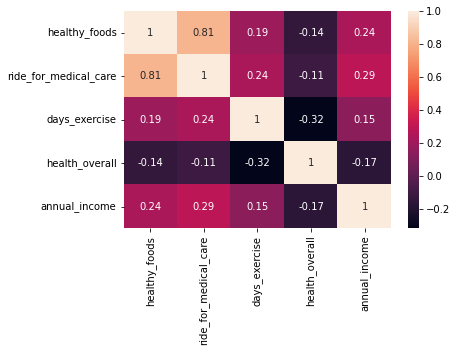

In [ ]:
sns.heatmap(corrMatrix_hispanic_df_a, annot=True)

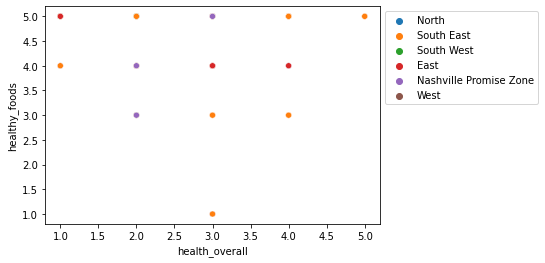

In [ ]:
sns.scatterplot(x='health_overall', y= 'healthy_foods',
                hue='Zone', data=a_new_hispanic_df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

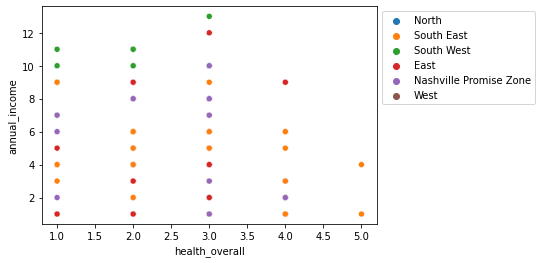

In [ ]:
sns.scatterplot(x='health_overall', y= 'annual_income',
                hue='Zone', data=a_new_hispanic_df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Text(50, 0.27, '13 = $200,000 Or More')

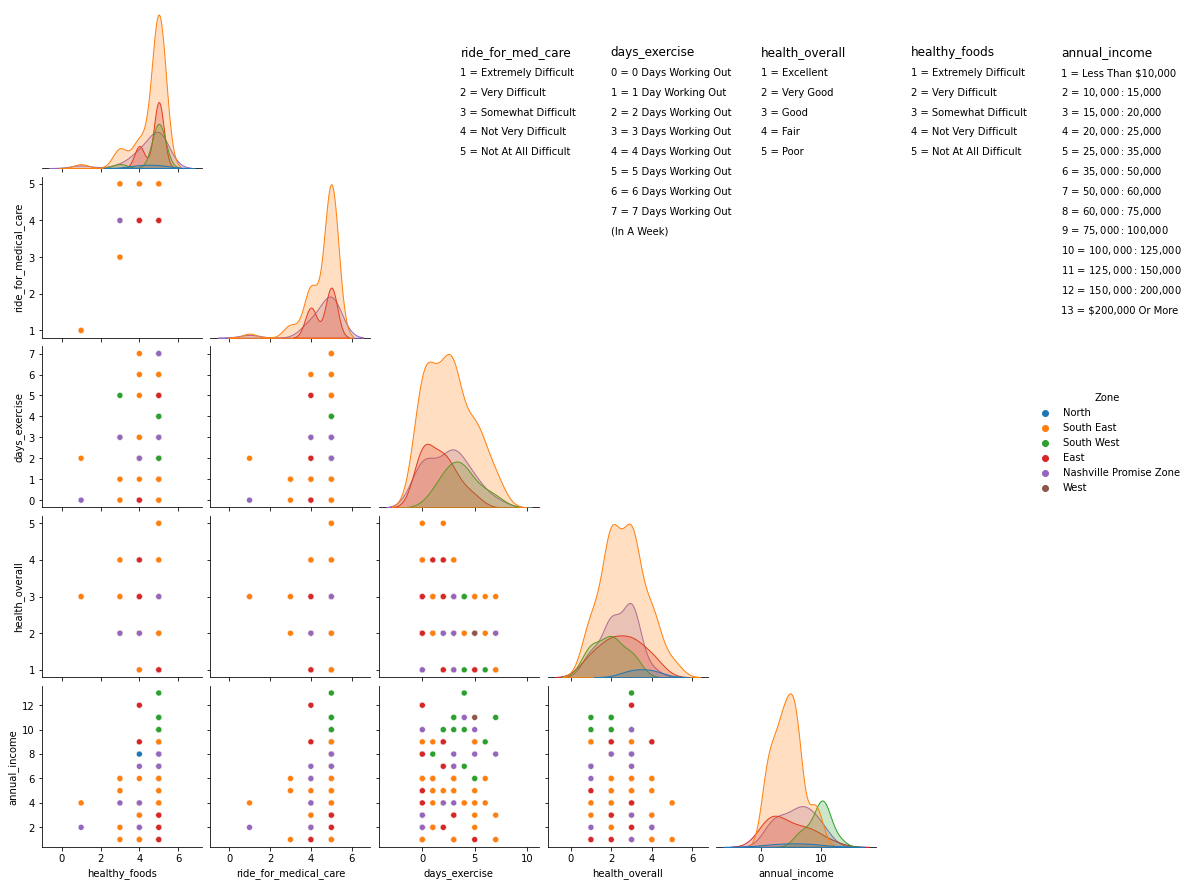

In [ ]:
sns.pairplot(a_new_hispanic_df, hue ="Zone", corner=True)
plt.text(-50, .4, "ride_for_med_care",fontsize = 12)
plt.text(-25, .4, "days_exercise",fontsize = 12)
plt.text(0, .4, "health_overall",fontsize = 12)
plt.text(25, .4, "healthy_foods",fontsize = 12)
plt.text(50, .4, "annual_income",fontsize = 12)
plt.text(-50, .39, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .38, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .37, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .36, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .35, "5 = Not At All Difficult", fontsize = 10)
plt.text(-25, .39, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-25, .38, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-25, .37, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-25, .36, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-25, .35, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-25, .34, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-25, .33, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-25, .32, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-25, .31, "(In A Week)",fontsize = 10)
plt.text(0, .39, "1 = Excellent",fontsize = 10)
plt.text(0, .38, "2 = Very Good",fontsize = 10)
plt.text(0, .37, "3 = Good",fontsize = 10)
plt.text(0, .36, "4 = Fair",fontsize = 10)
plt.text(0, .35, "5 = Poor",fontsize = 10)
plt.text(25, .39, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .38, "2 = Very Difficult",fontsize = 10)
plt.text(25, .37, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .36, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .35, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .39, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .38, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .37, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .36, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .35, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .34, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .33, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .32, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .31, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .3, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .29, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .28, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .27, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
a_new_hispanic_df.columns

Index(['healthy_foods', 'ride_for_medical_care', 'days_exercise',
       'health_overall', 'Zone', 'annual_income'],
      dtype='object')

In [ ]:
df_hispanic_north =a_new_hispanic_df[a_new_hispanic_df['Zone']=='North']
df_hispanic_north

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
194            4.0                    5.0            0.0             3.0   
357            5.0                    5.0            0.0             4.0   

      Zone  annual_income  
194  North            8.0  
357  North            3.0

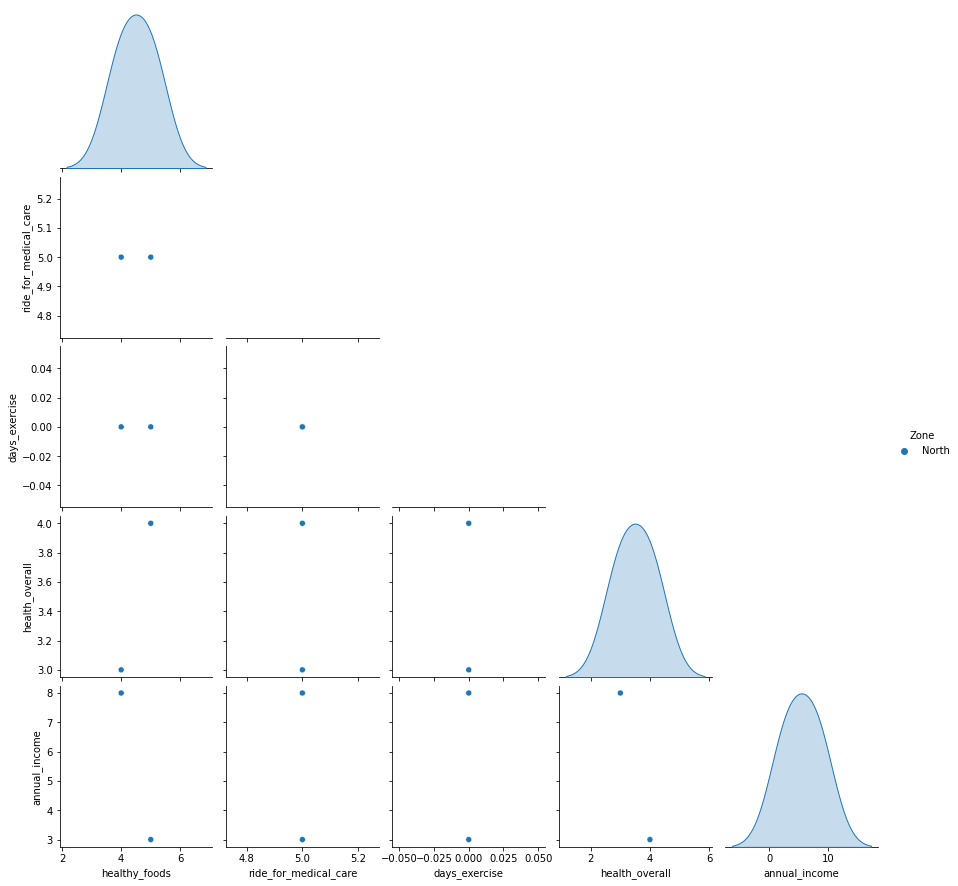

In [ ]:
sns.pairplot(df_hispanic_north, hue ="Zone", corner=True)

In [ ]:
df_hispanic_se =a_new_hispanic_df[a_new_hispanic_df['Zone']=='South East']
df_hispanic_plot = a_new_hispanic_df[['healthy_foods', 'ride_for_medical_care', 'days_exercise',
       'health_overall', 'Zone', 'annual_income']]
df_hispanic_plot

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
194             4.0                    5.0            0.0             3.0   
212             5.0                    5.0            1.0             2.0   
226             5.0                    5.0            2.0             3.0   
256             5.0                    5.0            0.0             4.0   
310             5.0                    5.0            3.0             3.0   
...             ...                    ...            ...             ...   
1790            4.0                    5.0            2.0             2.0   
1791            5.0                    5.0            6.0             2.0   
1800            4.0                    5.0            7.0             1.0   
1801            5.0                    5.0            5.0             1.0   
1804            5.0                    4.0            5.0             1.0   

                        Zone  annual_income  
194                    North            8.0  
212               South East            9.0  
226               South East            5.0  
256               South East            6.0  
310               South East            7.0  
...                      ...            ...  
1790  Nashville Promise Zone            4.0  
1791              South East            4.0  
1800              South East            1.0  
1801              South East            9.0  
1804                    East            1.0  

[104 rows x 6 columns]

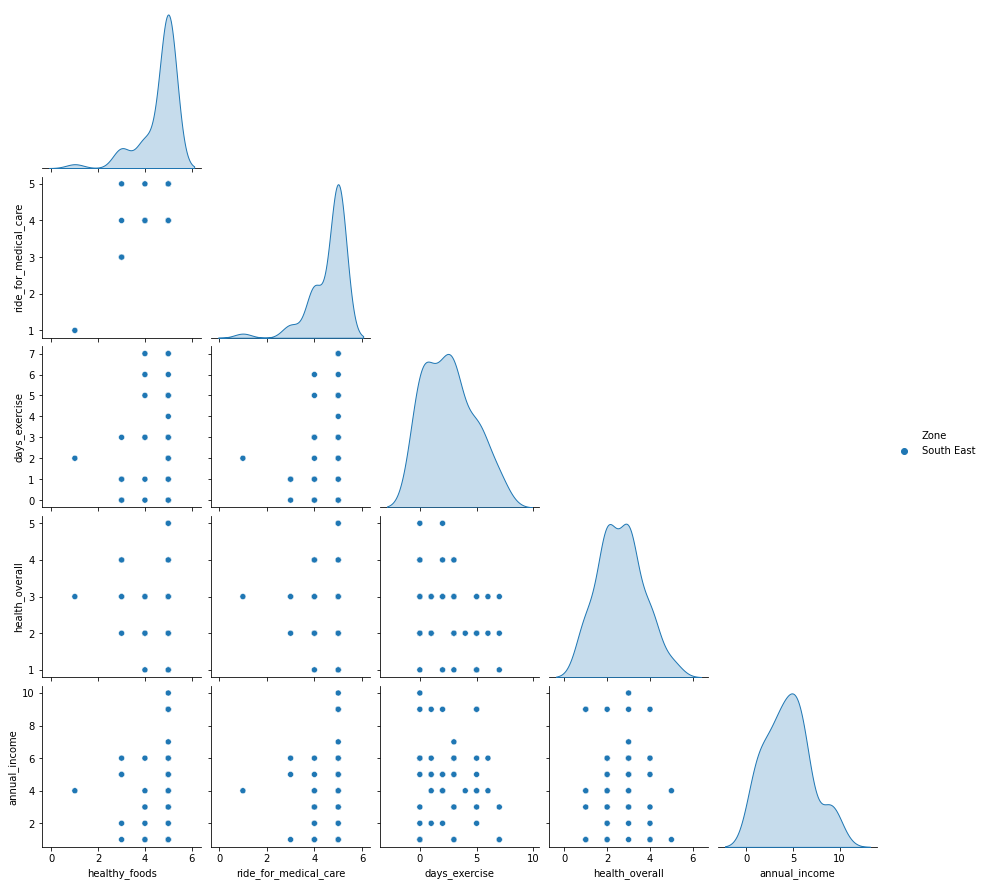

In [ ]:
sns.pairplot(df_hispanic_plot[df_hispanic_plot["Zone"] == "South East"], hue ="Zone", corner=True)

In [ ]:
##############################

In [ ]:
white_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
6              6                    East  104121   English        1   
8              8              South East  104271   English        2   
12            12                    East  105824   English        2   
13            13              South East  105921   English        1   
26            26              South West  109703   English        1   
...          ...                     ...     ...       ...      ...   
1795        1795                    East  110092   English        1   
1796        1796  Nashville Promise Zone  111117   English        2   
1799        1799              South East  106738   English        2   
1800        1800              South East  108538   English        1   
1802        1802              South East  108724   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
6               NaN     4.0            1          0.0          1.0  ...   
8               NaN     NaN            1          NaN          NaN  ...   
12              NaN     NaN            2          NaN          NaN  ...   
13              NaN     2.0            1          0.0          0.0  ...   
26              NaN     4.0            3          0.0          0.0  ...   
...             ...     ...          ...          ...          ...  ...   
1795            NaN     2.0            1          1.0          1.0  ...   
1796            NaN     NaN            2          NaN          NaN  ...   
1799            NaN     NaN            3          NaN          NaN  ...   
1800            NaN     4.0            2          1.0          0.0  ...   
1802            NaN     4.0            1          1.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
6                                                   5.0                                                                                                                                           
8                                                   1.0                                                                                                                                           
12                                                  2.0                                                                                                                                           
13                                                  1.0                                                                                                                                           
26                                                  1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1795                                                1.0                                                                                                                                           
1796                                                1.0                                                                                                                                           
1799                                                2.0                                                                                                                                           
1800                                                1.0                                                                                                                                           
1802                                                1.0                                                    

In [ ]:
white_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
white_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_b = white_df.columns[106]

In [ ]:
white_df.rename(columns = {exercise_b: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_white = white_df.columns[205]

In [ ]:
white_df.rename(columns = {health_gen_white:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
white_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_white_df = white_df[["healthy_foods", "ride_for_medical_care", "Zone"]]
new_white_df

healthy_foods  ride_for_medical_care                    Zone
6               NaN                    5.0                    East
8               4.0                    4.0              South East
12              5.0                    4.0                    East
13              5.0                    5.0              South East
26              5.0                    4.0              South West
...             ...                    ...                     ...
1795            5.0                    5.0                    East
1796            3.0                    4.0  Nashville Promise Zone
1799            5.0                    5.0              South East
1800            4.0                    5.0              South East
1802            2.0                    5.0              South East

[1218 rows x 3 columns]

In [ ]:
a_new_white_df = new_white_df.dropna()
a_new_white_df

healthy_foods  ride_for_medical_care                    Zone
8               4.0                    4.0              South East
12              5.0                    4.0                    East
13              5.0                    5.0              South East
26              5.0                    4.0              South West
33              5.0                    5.0                    East
...             ...                    ...                     ...
1795            5.0                    5.0                    East
1796            3.0                    4.0  Nashville Promise Zone
1799            5.0                    5.0              South East
1800            4.0                    5.0              South East
1802            2.0                    5.0              South East

[1209 rows x 3 columns]

In [ ]:
corrMatrix_white_df_a = a_new_white_df.corr(method = 'pearson')
print(corrMatrix_white_df_a)

                       healthy_foods  ride_for_medical_care
healthy_foods               1.000000               0.750927
ride_for_medical_care       0.750927               1.000000


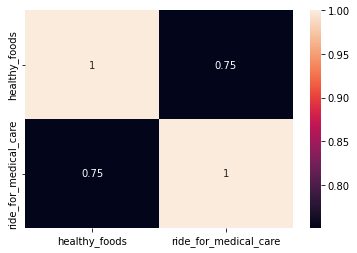

In [ ]:
sns.heatmap(corrMatrix_white_df_a, annot=True)

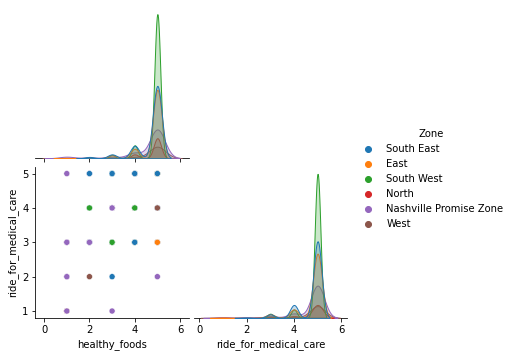

In [ ]:
sns.pairplot(a_new_white_df, hue ="Zone", corner=True)

#plt.text(-300, .18, "ride_for_med_care",fontsize = 12)
#plt.text(-150, .18, "days_exercise",fontsize = 12)
#plt.text(0, .18, "health_overall",fontsize = 12)
#plt.text(150, .18, "healthy_foods",fontsize = 12)
#plt.text(300, .18, "annual_income",fontsize = 12)
#plt.text(-300, .175, "1 = Extremely Difficult",fontsize = 10)
#plt.text(-300, .17, "2 = Very Difficult",fontsize = 10)
#plt.text(-300, .165, "3 = Somewhat Difficult", fontsize = 10)
#plt.text(-300, .16, "4 = Not Very Difficult", fontsize = 10)
#plt.text(-300, .155, "5 = Not At All Difficult", fontsize = 10)
#plt.text(-150, .175, "0 = 0 Days Working Out",fontsize = 10)
#plt.text(-150, .17, "1 = 1 Day Working Out",fontsize = 10)
#plt.text(-150, .165, "2 = 2 Days Working Out",fontsize = 10)
#plt.text(-150, .16, "3 = 3 Days Working Out",fontsize = 10)
#plt.text(-150, .155, "4 = 4 Days Working Out",fontsize = 10)
#plt.text(-150, .15, "5 = 5 Days Working Out",fontsize = 10)
#plt.text(-150, .145, "6 = 6 Days Working Out",fontsize = 10)
#plt.text(-150, .14, "7 = 7 Days Working Out",fontsize = 10)
#plt.text(-150, .135, "(In A Week)",fontsize = 10)
#plt.text(0, .175, "1 = Excellent",fontsize = 10)
#plt.text(0, .17, "2 = Very Good",fontsize = 10)
#plt.text(0, .165, "3 = Good",fontsize = 10)
#plt.text(0, .16, "4 = Fair",fontsize = 10)
#plt.text(0, .155, "5 = Poor",fontsize = 10)
#plt.text(150, .175, "1 = Extremely Difficult",fontsize = 10)
#plt.text(150, .17, "2 = Very Difficult",fontsize = 10)
#plt.text(150, .165, "3 = Somewhat Difficult", fontsize = 10)
#plt.text(150, .16, "4 = Not Very Difficult", fontsize = 10)
#plt.text(150, .155, "5 = Not At All Difficult", fontsize = 10)
#plt.text(300, .175, "1 = Less Than $10,000",fontsize = 10)
#plt.text(300, .17, "2 = $10,000 : $15,000",fontsize = 10)
#plt.text(300, .165, "3 = $15,000 : $20,000", fontsize = 10)
#plt.text(300, .16, "4 = $20,000 : $25,000", fontsize = 10)
#plt.text(300, .155, "5 = $25,000 : $35,000", fontsize = 10)
#plt.text(300, .15, "6 = $35,000 : $50,000", fontsize = 10)
#plt.text(300, .145, "7 = $50,000 : $60,000", fontsize = 10)
#plt.text(300, .14, "8 = $60,000 : $75,000", fontsize = 10)
#plt.text(300, .135, "9 = $75,000 : $100,000", fontsize = 10)
#plt.text(300, .13, "10 = $100,000 : $125,000", fontsize = 10)
#plt.text(300, .125, "11 = $125,000 : $150,000", fontsize = 10)
#plt.text(300, .12, "12 = $150,000 : $200,000", fontsize = 10)
#plt.text(300, .115, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
#######################

In [ ]:
black_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
7              7                   North  104179   English        1   
53            53  Nashville Promise Zone  100667   English        2   
66            66                    West  111532   English        2   
69            69                   North  101203   English        2   
71            71  Nashville Promise Zone  102518   English        1   
...          ...                     ...     ...       ...      ...   
1783        1783              South West  110353   English        1   
1786        1786  Nashville Promise Zone  111275   English        1   
1797        1797                    East  100243   English        1   
1798        1798  Nashville Promise Zone  100735   English        1   
1803        1803              South East  101453   English        2   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
7               NaN     1.0            2          1.0          1.0  ...   
53              NaN     NaN            2          NaN          NaN  ...   
66              NaN     NaN            2          NaN          NaN  ...   
69              NaN     NaN            2          NaN          NaN  ...   
71              NaN     1.0            2          1.0          1.0  ...   
...             ...     ...          ...          ...          ...  ...   
1783            NaN     4.0           SW          0.0          1.0  ...   
1786            NaN     4.0            1          1.0          1.0  ...   
1797            NaN     4.0            2          1.0          1.0  ...   
1798            NaN     4.0            1          0.0          1.0  ...   
1803            NaN     NaN            2          NaN          NaN  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
7                                                   1.0                                                                                                                                           
53                                                  1.0                                                                                                                                           
66                                                  1.0                                                                                                                                           
69                                                  1.0                                                                                                                                           
71                                                  1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1783                                                1.0                                                                                                                                           
1786                                                3.0                                                                                                                                           
1797                                                2.0                                                                                                                                           
1798                                                2.0                                                                                                                                           
1803                                                1.0                                                    

In [ ]:
black_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
black_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_c = black_df.columns[106]

In [ ]:
black_df.rename(columns = {exercise_c: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_black = black_df.columns[205]

In [ ]:
black_df.rename(columns = {health_gen_black:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
black_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_black_df = black_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_black_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
7               5.0                    5.0            2.0             2.0   
53              5.0                    5.0            5.0             4.0   
66              5.0                    5.0            5.0             3.0   
69              5.0                    3.0            5.0             2.0   
71              5.0                    5.0            5.0             4.0   
...             ...                    ...            ...             ...   
1783            5.0                    5.0            2.0             2.0   
1786            5.0                    5.0            1.0             3.0   
1797            5.0                    5.0            5.0             3.0   
1798            5.0                    5.0            3.0             2.0   
1803            4.0                    5.0            2.0             3.0   

                        Zone  annual_income  
7                      North            NaN  
53    Nashville Promise Zone            1.0  
66                      West            8.0  
69                     North            NaN  
71    Nashville Promise Zone            6.0  
...                      ...            ...  
1783              South West            8.0  
1786  Nashville Promise Zone            4.0  
1797                    East            1.0  
1798  Nashville Promise Zone            3.0  
1803              South East           12.0  

[422 rows x 6 columns]

In [ ]:
a_new_black_df = new_black_df.dropna()
a_new_black_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
53              5.0                    5.0            5.0             4.0   
66              5.0                    5.0            5.0             3.0   
71              5.0                    5.0            5.0             4.0   
78              4.0                    4.0            3.0             5.0   
79              5.0                    5.0            3.0             3.0   
...             ...                    ...            ...             ...   
1783            5.0                    5.0            2.0             2.0   
1786            5.0                    5.0            1.0             3.0   
1797            5.0                    5.0            5.0             3.0   
1798            5.0                    5.0            3.0             2.0   
1803            4.0                    5.0            2.0             3.0   

                        Zone  annual_income  
53    Nashville Promise Zone            1.0  
66                      West            8.0  
71    Nashville Promise Zone            6.0  
78                      East            2.0  
79                      East            2.0  
...                      ...            ...  
1783              South West            8.0  
1786  Nashville Promise Zone            4.0  
1797                    East            1.0  
1798  Nashville Promise Zone            3.0  
1803              South East           12.0  

[376 rows x 6 columns]

In [ ]:
corrMatrix_black_df_a = a_new_black_df.corr(method = 'pearson')
print(corrMatrix_black_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.734648       0.023488   
ride_for_medical_care       0.734648               1.000000      -0.011172   
days_exercise               0.023488              -0.011172       1.000000   
health_overall             -0.245987              -0.195902      -0.071135   
annual_income               0.356029               0.352530      -0.039776   

                       health_overall  annual_income  
healthy_foods               -0.245987       0.356029  
ride_for_medical_care       -0.195902       0.352530  
days_exercise               -0.071135      -0.039776  
health_overall               1.000000      -0.274719  
annual_income               -0.274719       1.000000  


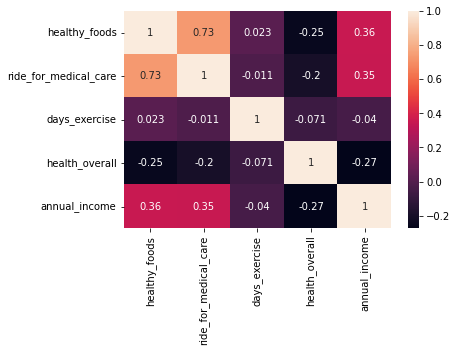

In [ ]:
sns.heatmap(corrMatrix_black_df_a, annot=True)

Text(60, 0.185, '13 = $200,000 Or More')

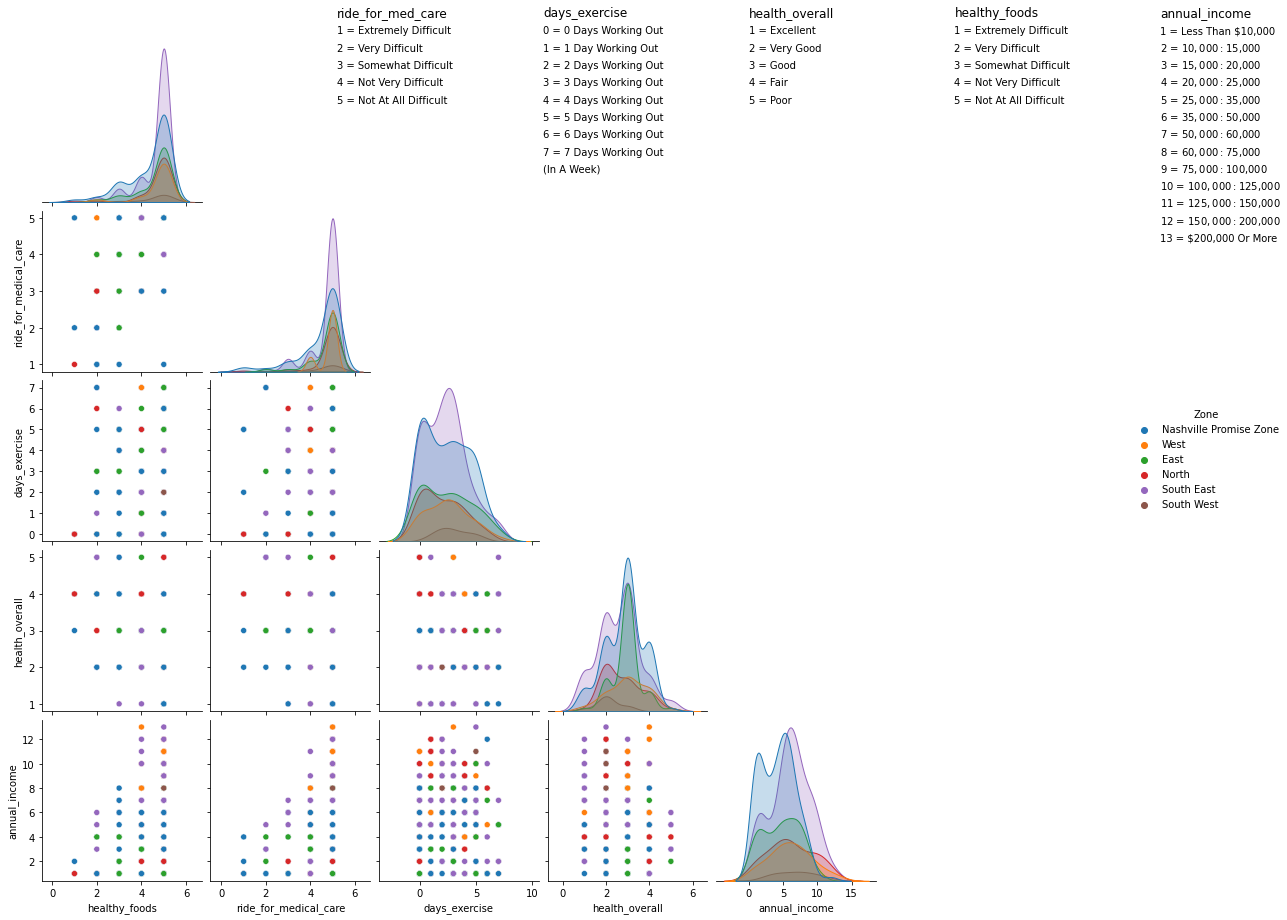

In [ ]:
sns.pairplot(a_new_black_df, hue ="Zone", corner=True)
plt.text(-60, .25, "ride_for_med_care",fontsize = 12)
plt.text(-30, .25, "days_exercise",fontsize = 12)
plt.text(0, .25, "health_overall",fontsize = 12)
plt.text(30, .25, "healthy_foods",fontsize = 12)
plt.text(60, .25, "annual_income",fontsize = 12)
plt.text(-60, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(-60, .24, "2 = Very Difficult",fontsize = 10)
plt.text(-60, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-60, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(-60, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(-30, .245, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-30, .24, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-30, .235, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-30, .23, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-30, .225, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-30, .22, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-30, .215, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-30, .21, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-30, .205, "(In A Week)",fontsize = 10)
plt.text(0, .245, "1 = Excellent",fontsize = 10)
plt.text(0, .24, "2 = Very Good",fontsize = 10)
plt.text(0, .235, "3 = Good",fontsize = 10)
plt.text(0, .23, "4 = Fair",fontsize = 10)
plt.text(0, .225, "5 = Poor",fontsize = 10)
plt.text(30, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(30, .24, "2 = Very Difficult",fontsize = 10)
plt.text(30, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(30, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(30, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(60, .245, "1 = Less Than $10,000",fontsize = 10)
plt.text(60, .24, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(60, .235, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(60, .23, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(60, .225, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(60, .22, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(60, .215, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(60, .21, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(60, .205, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(60, .20, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(60, .195, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(60, .19, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(60, .185, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
################

In [ ]:
asian_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
85            85              South East  105988   English        2   
117          117  Nashville Promise Zone  110594   English        1   
140          140              South West  100352   English        2   
271          271  Nashville Promise Zone  101318   English        1   
288          288              South West  110602   English        2   
312          312                    East  106469   English        1   
361          361              South East  109626   English        2   
384          384              South East  101523   English        2   
414          414              South East  102396   English        1   
457          457                    East  110756   English        1   
462          462              South East  107280   English        1   
463          463  Nashville Promise Zone  107284   English        1   
524          524  Nashville Promise Zone  103705   English        1   
530          530              South East  112130   English        1   
552          552              South West  102891   English        1   
559          559                    East  107638   English        1   
563          563              South West  111349   English        1   
589          589              South East  105909   English        1   
610          610                    East  109199   English        1   
623          623              South West  105524   English        1   
630          630              South East  111854   English        1   
638          638              South West  108504   English        1   
679          679              South East  110486   English        1   
715          715              South East  106545   English        1   
718          718              South West  100766   English        1   
732          732              South East  110986   English        2   
768          768  Nashville Promise Zone  109858   English        2   
1203        1203              South West  109312   English        1   
1214        1214                   North  105387   English        1   
1265        1265              South East  110006   English        1   
1300        1300                    West  104437   English        1   
1322        1322              South East  110234   English        1   
1360        1360              South East  106893   English        1   
1389        1389                    East  105301   English        2   
1394        1394                    East  108413   English        1   
1427        1427              South East  109810   English        1   
1454        1454                   North  112060   English        1   
1467        1467                    East  110100   English        1   
1483        1483              South East  110917   English        1   
1664        1664              South West  104689   English        1   
1673        1673  Nashville Promise Zone  108267   English        1   
1713        1713  Nashville Promise Zone  102071   English        1   
1717        1717                    West  105303   English        1   
1742        1742              South West  106371   English        2   
1743        1743              South East  106647   English        1   
1767        1767              South West  105987   English        2   
1779        1779                    West  103805   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
85              NaN     NaN            1          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
140             NaN     NaN           SW          NaN          NaN  ...   
271             NaN     2.0            1          1.0          1.0  ...   
288             NaN     NaN            3          NaN          NaN  ...   
312             NaN     2.0            3          1.0          1.0  ...   
361             NaN     NaN            1          NaN          NaN  ... 

In [ ]:
asian_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
asian_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_d = asian_df.columns[106]

In [ ]:
asian_df.rename(columns = {exercise_d: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_asian = asian_df.columns[205]

In [ ]:
asian_df.rename(columns = {health_gen_asian:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
asian_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_asian_df = asian_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_asian_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
85              3.0                    4.0            5.0             3.0   
117             3.0                    4.0            0.0             2.0   
140             5.0                    5.0            5.0             3.0   
271             5.0                    5.0            1.0             3.0   
288             5.0                    5.0            NaN             1.0   
312             5.0                    5.0            7.0             1.0   
361             5.0                    5.0            7.0             1.0   
384             5.0                    5.0            2.0             4.0   
414             5.0                    5.0            4.0             4.0   
457             4.0                    4.0            2.0             3.0   
462             4.0                    4.0            3.0             2.0   
463             4.0                    3.0            0.0             2.0   
524             4.0                    5.0            0.0             3.0   
530             5.0                    5.0            0.0             1.0   
552             4.0                    4.0            4.0             1.0   
559             5.0                    4.0            4.0             1.0   
563             5.0                    5.0            1.0             1.0   
589             5.0                    5.0            0.0             1.0   
610             4.0                    2.0            3.0             2.0   
623             5.0                    4.0            3.0             2.0   
630             5.0                    4.0            5.0             2.0   
638             5.0                    5.0            5.0             2.0   
679             4.0                    4.0            2.0             2.0   
715             5.0                    5.0            0.0             2.0   
718             5.0                    5.0            2.0             2.0   
732             4.0                    4.0            2.0             3.0   
768             3.0                    3.0            0.0             3.0   
1203            5.0                    5.0            1.0             2.0   
1214            4.0                    4.0            3.0             3.0   
1265            5.0                    5.0            0.0             3.0   
1300            5.0                    5.0            3.0             3.0   
1322            5.0                    5.0            2.0             1.0   
1360            5.0                    5.0            0.0             3.0   
1389            5.0                    5.0            0.0             2.0   
1394            5.0                    5.0            3.0             2.0   
1427            5.0                    5.0            3.0             3.0   
1454            4.0                    4.0            2.0             4.0   
1467            4.0                    5.0            5.0             3.0   
1483            2.0                    2.0            3.0             2.0   
1664            5.0                    4.0            2.0             2.0   
1673            4.0                    4.0            4.0             2.0   
1713            4.0                    4.0            0.0             3.0   
1717            5.0                    5.0            3.0             2.0   
1742            5.0                    5.0            4.0             3.0   
1743            4.0                    4.0            1.0             2.0   
1767            5.0                    5.0            2.0             1.0   
1779            5.0                    5.0            3.0             1.0   

                        Zone  annual_income  
85                South East            8.0  
117   Nashville Promise Zone            5.0  
140               South West            9.0  
271   Nashville Promise Zone            6.0  
288               South West            5.0  
312                     East     

In [ ]:
a_new_asian_df = new_asian_df.dropna()
a_new_asian_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
85              3.0                    4.0            5.0             3.0   
117             3.0                    4.0            0.0             2.0   
140             5.0                    5.0            5.0             3.0   
271             5.0                    5.0            1.0             3.0   
312             5.0                    5.0            7.0             1.0   
361             5.0                    5.0            7.0             1.0   
384             5.0                    5.0            2.0             4.0   
414             5.0                    5.0            4.0             4.0   
457             4.0                    4.0            2.0             3.0   
462             4.0                    4.0            3.0             2.0   
463             4.0                    3.0            0.0             2.0   
524             4.0                    5.0            0.0             3.0   
552             4.0                    4.0            4.0             1.0   
559             5.0                    4.0            4.0             1.0   
563             5.0                    5.0            1.0             1.0   
589             5.0                    5.0            0.0             1.0   
610             4.0                    2.0            3.0             2.0   
623             5.0                    4.0            3.0             2.0   
630             5.0                    4.0            5.0             2.0   
638             5.0                    5.0            5.0             2.0   
679             4.0                    4.0            2.0             2.0   
715             5.0                    5.0            0.0             2.0   
718             5.0                    5.0            2.0             2.0   
732             4.0                    4.0            2.0             3.0   
768             3.0                    3.0            0.0             3.0   
1203            5.0                    5.0            1.0             2.0   
1214            4.0                    4.0            3.0             3.0   
1265            5.0                    5.0            0.0             3.0   
1300            5.0                    5.0            3.0             3.0   
1322            5.0                    5.0            2.0             1.0   
1360            5.0                    5.0            0.0             3.0   
1389            5.0                    5.0            0.0             2.0   
1394            5.0                    5.0            3.0             2.0   
1427            5.0                    5.0            3.0             3.0   
1454            4.0                    4.0            2.0             4.0   
1467            4.0                    5.0            5.0             3.0   
1483            2.0                    2.0            3.0             2.0   
1664            5.0                    4.0            2.0             2.0   
1673            4.0                    4.0            4.0             2.0   
1713            4.0                    4.0            0.0             3.0   
1717            5.0                    5.0            3.0             2.0   
1742            5.0                    5.0            4.0             3.0   
1743            4.0                    4.0            1.0             2.0   
1767            5.0                    5.0            2.0             1.0   
1779            5.0                    5.0            3.0             1.0   

                        Zone  annual_income  
85                South East            8.0  
117   Nashville Promise Zone            5.0  
140               South West            9.0  
271   Nashville Promise Zone            6.0  
312                     East            9.0  
361               South East            7.0  
384               South East            7.0  
414               South East           10.0  
457                     East           12.0  
462

In [ ]:
corrMatrix_asian_df_a = a_new_asian_df.corr(method = 'pearson')
print(corrMatrix_asian_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.747200       0.110688   
ride_for_medical_care       0.747200               1.000000       0.063070   
days_exercise               0.110688               0.063070       1.000000   
health_overall             -0.176252              -0.002241      -0.146689   
annual_income               0.297370               0.239670       0.104768   

                       health_overall  annual_income  
healthy_foods               -0.176252       0.297370  
ride_for_medical_care       -0.002241       0.239670  
days_exercise               -0.146689       0.104768  
health_overall               1.000000       0.123367  
annual_income                0.123367       1.000000  


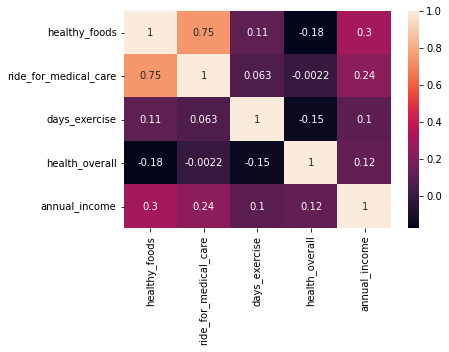

In [ ]:
sns.heatmap(corrMatrix_asian_df_a, annot=True)

Text(60, 0.185, '13 = $200,000 Or More')

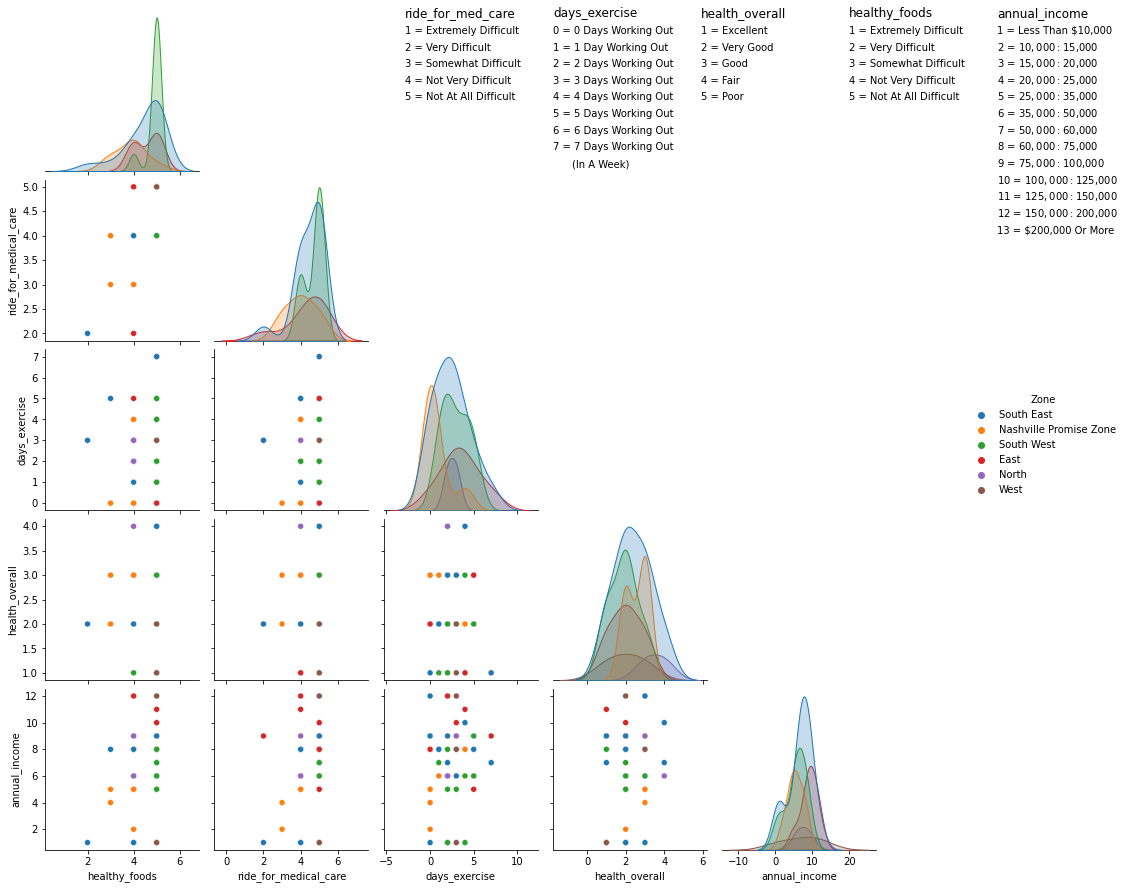

In [ ]:
sns.pairplot(a_new_asian_df, hue ="Zone", corner=True)
plt.text(-100, .25, "ride_for_med_care",fontsize = 12)
plt.text(-60, .25, "days_exercise",fontsize = 12)
plt.text(-20, .25, "health_overall",fontsize = 12)
plt.text(20, .25, "healthy_foods",fontsize = 12)
plt.text(60, .25, "annual_income",fontsize = 12)
plt.text(-100, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(-100, .24, "2 = Very Difficult",fontsize = 10)
plt.text(-100, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-100, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(-100, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(-60, .245, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-60, .24, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-60, .235, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-60, .23, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-60, .225, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-60, .22, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-60, .215, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-60, .21, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-55, .205, "(In A Week)",fontsize = 10)
plt.text(-20, .245, "1 = Excellent",fontsize = 10)
plt.text(-20, .24, "2 = Very Good",fontsize = 10)
plt.text(-20, .235, "3 = Good",fontsize = 10)
plt.text(-20, .23, "4 = Fair",fontsize = 10)
plt.text(-20, .225, "5 = Poor",fontsize = 10)
plt.text(20, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(20, .24, "2 = Very Difficult",fontsize = 10)
plt.text(20, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(20, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(20, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(60, .245, "1 = Less Than $10,000",fontsize = 10)
plt.text(60, .24, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(60, .235, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(60, .23, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(60, .225, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(60, .22, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(60, .215, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(60, .21, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(60, .205, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(60, .20, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(60, .195, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(60, .19, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(60, .185, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
######################

In [ ]:
pacific_islander_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
117          117  Nashville Promise Zone  110594   English        1   
601          601              South East  110534   English        1   
604          604              South West  101456   English        1   
855          855              South West  101712   English        2   
860          860              South East  106040   English        2   
1111        1111              South East  109541   English        1   
1654        1654  Nashville Promise Zone  101205   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
117      chromebook     5.0            1          1.0          1.0  ...   
601             NaN     1.0            1          1.0          1.0  ...   
604             NaN     4.0            3          1.0          1.0  ...   
855             NaN     NaN           SW          NaN          NaN  ...   
860             NaN     NaN            1          NaN          NaN  ...   
1111            NaN     NaN            1          1.0          1.0  ...   
1654            NaN     4.0            2          0.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
117                                                 1.0                                                                                                                                           
601                                                 1.0                                                                                                                                           
604                                                 1.0                                                                                                                                           
855                                                 1.0                                                                                                                                           
860                                                 1.0                                                                                                                                           
1111                                                2.0                                                                                                                                           
1654                                                3.0                                                                                                                                           

      Other than cost), have you delayed getting needed medical care for any of the following reasons in the past 12 months?   \
117                                                 6.0                                                                         
601                                                 7.0                                                                         
604                                                 7.0                                                                         
855                                                 7.0                                                                         
860                                                 7.0                                                                         
1111                                                7.0                                                                         
1654                                                6.0                                                                         

      Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?  \
117                                                 NaN                                                       
601                 

In [ ]:
pacific_islander_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pacific_islander_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_e = pacific_islander_df.columns[106]

In [ ]:
pacific_islander_df.rename(columns = {exercise_e: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_pi = pacific_islander_df.columns[205]

In [ ]:
pacific_islander_df.rename(columns = {health_gen_pi:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pacific_islander_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_pi_df = pacific_islander_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_pi_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
117             3.0                    4.0            0.0             2.0   
601             5.0                    5.0            2.0             2.0   
604             4.0                    5.0            4.0             2.0   
855             5.0                    5.0            4.0             3.0   
860             5.0                    5.0            0.0             3.0   
1111            5.0                    5.0            0.0             2.0   
1654            5.0                    5.0            6.0             3.0   

                        Zone  annual_income  
117   Nashville Promise Zone            5.0  
601               South East            6.0  
604               South West            7.0  
855               South West            5.0  
860               South East            6.0  
1111              South East            9.0  
1654  Nashville Promise Zone            9.0

In [ ]:
corrMatrix_pi_df_a = new_pi_df.corr(method = 'pearson')
print(corrMatrix_pi_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.880705       0.249068   
ride_for_medical_care       0.880705               1.000000       0.414781   
days_exercise               0.249068               0.414781       1.000000   
health_overall              0.509525               0.353553       0.403280   
annual_income               0.390621               0.443533       0.264455   

                       health_overall  annual_income  
healthy_foods                0.509525       0.390621  
ride_for_medical_care        0.353553       0.443533  
days_exercise                0.403280       0.264455  
health_overall               1.000000      -0.026135  
annual_income               -0.026135       1.000000  


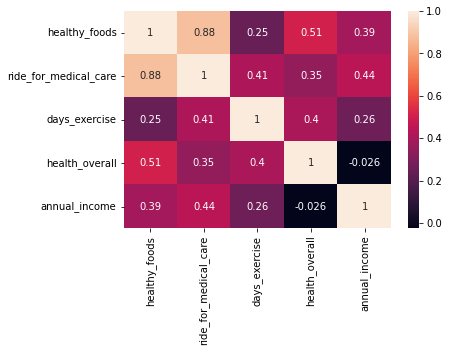

In [ ]:
sns.heatmap(corrMatrix_pi_df_a, annot=True)

Text(50, 0.305, '13 = $200,000 Or More')

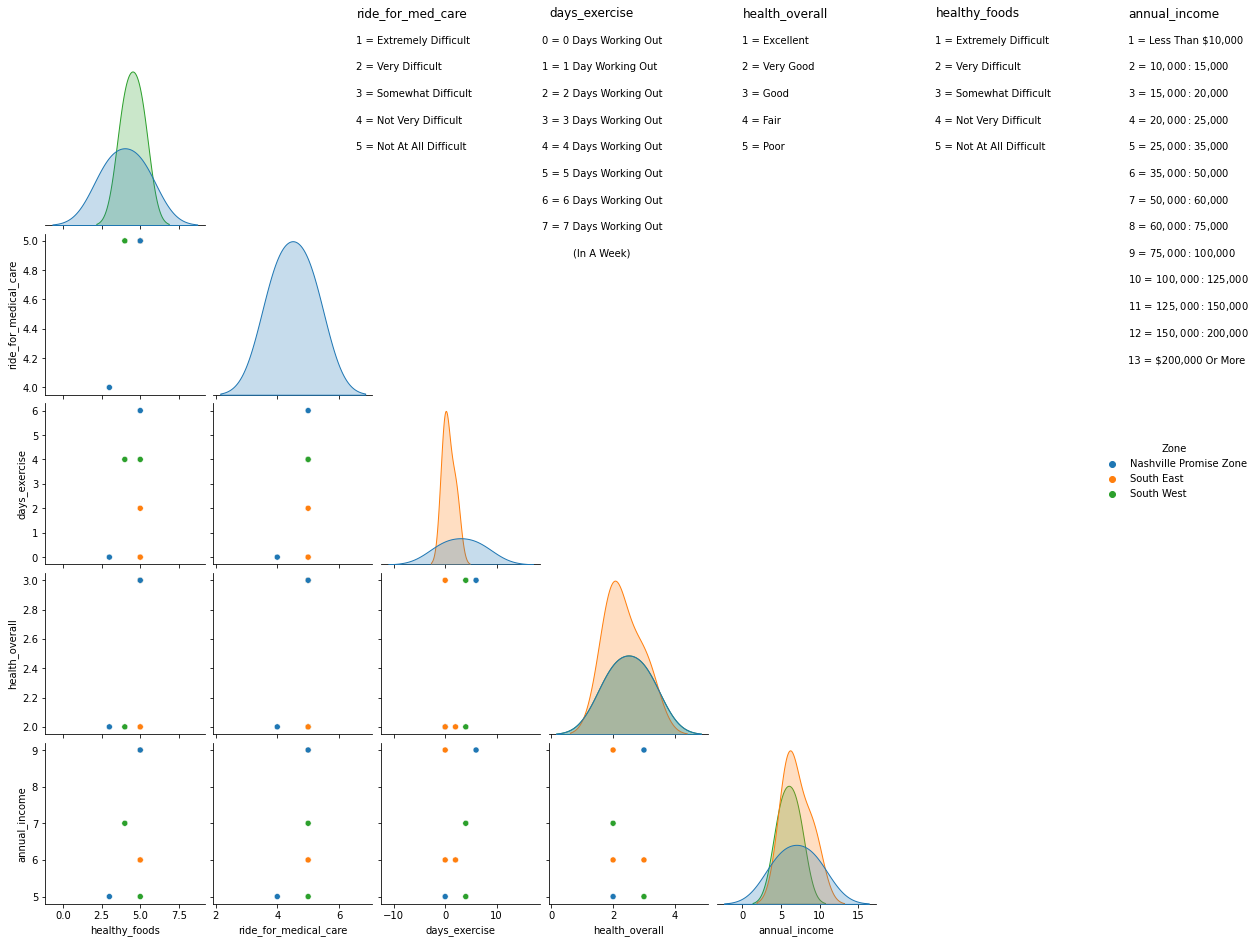

In [ ]:
sns.pairplot(new_pi_df, hue ="Zone", corner=True)
plt.text(-50, .5, "ride_for_med_care",fontsize = 12)
plt.text(-25, .5, "days_exercise",fontsize = 12)
plt.text(0, .5, "health_overall",fontsize = 12)
plt.text(25, .5, "healthy_foods",fontsize = 12)
plt.text(50, .5, "annual_income",fontsize = 12)
plt.text(-50, .485, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .47, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .455, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .44, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .425, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, .485, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, .47, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, .455, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, .44, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, .425, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, .41, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, .395, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, .38, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, .365, "(In A Week)",fontsize = 10)
plt.text(0, .485, "1 = Excellent",fontsize = 10)
plt.text(0, .47, "2 = Very Good",fontsize = 10)
plt.text(0, .455, "3 = Good",fontsize = 10)
plt.text(0, .44, "4 = Fair",fontsize = 10)
plt.text(0, .425, "5 = Poor",fontsize = 10)
plt.text(25, .485, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .47, "2 = Very Difficult",fontsize = 10)
plt.text(25, .455, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .44, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .425, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .485, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .47, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .455, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .44, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .425, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .41, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .395, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .38, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .365, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .35, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .335, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .32, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .305, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
################

In [ ]:
native_american_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
95            95                   North  111159   English        2   
109          109              South East  109611   English        2   
117          117  Nashville Promise Zone  110594   English        1   
153          153  Nashville Promise Zone  100346   English        1   
355          355  Nashville Promise Zone  109990   English        1   
378          378                    West  108086   English        1   
476          476  Nashville Promise Zone  107058   Spanish        1   
582          582              South East  111882   English        1   
615          615              South East  111678   English        1   
664          664  Nashville Promise Zone  101007   English        1   
818          818                    East  101337   English        1   
1007        1007                    East  111858   English        2   
1056        1056              South East  106113   English        1   
1111        1111              South East  109541   English        1   
1441        1441                    East  105868   English        1   
1444        1444              South East  107722   English        1   
1487        1487                    East  112199   Spanish        1   
1506        1506                    East  110679   English        2   
1519        1519  Nashville Promise Zone  105758   English        2   
1613        1613              South East  104789   English        1   
1782        1782  Nashville Promise Zone  110302   English        1   
1787        1787  Nashville Promise Zone  111391   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
95              NaN     NaN            2          NaN          NaN  ...   
109             NaN     NaN            1          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
153             NaN     1.0            1          1.0          1.0  ...   
355             NaN     2.0            3          1.0          1.0  ...   
378             NaN     1.0            W          1.0          1.0  ...   
476             NaN     4.0            1          1.0          1.0  ...   
582             NaN     2.0            1          1.0          1.0  ...   
615            Ipod     5.0            1          1.0          1.0  ...   
664             NaN     4.0            2          1.0          1.0  ...   
818             NaN     1.0            2          1.0          1.0  ...   
1007            NaN     NaN            3          NaN          NaN  ...   
1056            NaN     2.0            3          0.0          0.0  ...   
1111            NaN     NaN            1          1.0          1.0  ...   
1441            NaN     4.0            2          1.0          1.0  ...   
1444            NaN     4.0            2          1.0          1.0  ...   
1487            NaN     4.0            1          0.0          1.0  ...   
1506            NaN     NaN            2          NaN          NaN  ...   
1519            NaN     NaN            3          NaN          NaN  ...   
1613            NaN     4.0            1          1.0          1.0  ...   
1782            NaN     2.0            1          1.0          1.0  ...   
1787            NaN     4.0            1          1.0          1.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
95                                                  1.0                                                                                                                                           
109                                                 1.0                                                                                                                                           
117                                                 1.0      

In [ ]:
native_american_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
native_american_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_f = native_american_df.columns[106]

In [ ]:
native_american_df.rename(columns = {exercise_f: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_na = native_american_df.columns[205]

In [ ]:
native_american_df.rename(columns = {health_gen_na:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
native_american_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_na_df = native_american_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_na_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
95              5.0                    5.0            4.0             3.0   
109             3.0                    3.0            5.0             3.0   
117             3.0                    4.0            0.0             2.0   
153             4.0                    5.0            2.0             5.0   
355             1.0                    1.0            6.0             2.0   
378             5.0                    5.0            7.0             1.0   
476             5.0                    4.0            0.0             1.0   
582             5.0                    5.0            3.0             2.0   
615             5.0                    5.0            4.0             2.0   
664             5.0                    5.0            5.0             1.0   
818             5.0                    3.0            0.0             4.0   
1007            4.0                    4.0            2.0             2.0   
1056            4.0                    4.0            6.0             2.0   
1111            5.0                    5.0            0.0             2.0   
1441            5.0                    5.0            7.0             2.0   
1444            5.0                    5.0            2.0             4.0   
1487            5.0                    5.0            2.0             3.0   
1506            5.0                    5.0            2.0             3.0   
1519            5.0                    4.0            NaN             2.0   
1613            5.0                    5.0            0.0             2.0   
1782            3.0                    3.0            3.0             2.0   
1787            3.0                    4.0            3.0             2.0   

                        Zone  annual_income  
95                     North            6.0  
109               South East            2.0  
117   Nashville Promise Zone            5.0  
153   Nashville Promise Zone            5.0  
355   Nashville Promise Zone            5.0  
378                     West           13.0  
476   Nashville Promise Zone            6.0  
582               South East           10.0  
615               South East            9.0  
664   Nashville Promise Zone            6.0  
818                     East            5.0  
1007                    East            9.0  
1056              South East            NaN  
1111              South East            9.0  
1441                    East            8.0  
1444              South East            8.0  
1487                    East            2.0  
1506                    East            8.0  
1519  Nashville Promise Zone            8.0  
1613              South East            6.0  
1782  Nashville Promise Zone            5.0  
1787  Nashville Promise Zone            4.0

In [ ]:
a_new_na_df = new_na_df.dropna()
a_new_na_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
95              5.0                    5.0            4.0             3.0   
109             3.0                    3.0            5.0             3.0   
117             3.0                    4.0            0.0             2.0   
153             4.0                    5.0            2.0             5.0   
355             1.0                    1.0            6.0             2.0   
378             5.0                    5.0            7.0             1.0   
476             5.0                    4.0            0.0             1.0   
582             5.0                    5.0            3.0             2.0   
615             5.0                    5.0            4.0             2.0   
664             5.0                    5.0            5.0             1.0   
818             5.0                    3.0            0.0             4.0   
1007            4.0                    4.0            2.0             2.0   
1111            5.0                    5.0            0.0             2.0   
1441            5.0                    5.0            7.0             2.0   
1444            5.0                    5.0            2.0             4.0   
1487            5.0                    5.0            2.0             3.0   
1506            5.0                    5.0            2.0             3.0   
1613            5.0                    5.0            0.0             2.0   
1782            3.0                    3.0            3.0             2.0   
1787            3.0                    4.0            3.0             2.0   

                        Zone  annual_income  
95                     North            6.0  
109               South East            2.0  
117   Nashville Promise Zone            5.0  
153   Nashville Promise Zone            5.0  
355   Nashville Promise Zone            5.0  
378                     West           13.0  
476   Nashville Promise Zone            6.0  
582               South East           10.0  
615               South East            9.0  
664   Nashville Promise Zone            6.0  
818                     East            5.0  
1007                    East            9.0  
1111              South East            9.0  
1441                    East            8.0  
1444              South East            8.0  
1487                    East            2.0  
1506                    East            8.0  
1613              South East            6.0  
1782  Nashville Promise Zone            5.0  
1787  Nashville Promise Zone            4.0

In [ ]:
corrMatrix_na_df_a = a_new_na_df.corr(method = 'pearson')
print(corrMatrix_na_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.828356      -0.204749   
ride_for_medical_care       0.828356               1.000000      -0.107945   
days_exercise              -0.204749              -0.107945       1.000000   
health_overall              0.026743               0.027922      -0.258024   
annual_income               0.443196               0.426720       0.208543   

                       health_overall  annual_income  
healthy_foods                0.026743       0.443196  
ride_for_medical_care        0.027922       0.426720  
days_exercise               -0.258024       0.208543  
health_overall               1.000000      -0.342261  
annual_income               -0.342261       1.000000  


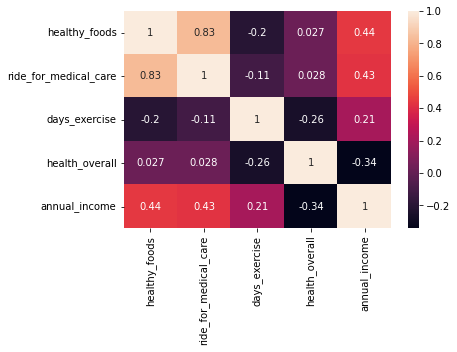

In [ ]:
sns.heatmap(corrMatrix_na_df_a, annot=True)

Text(50, 0.61, '13 = $200,000 Or More')

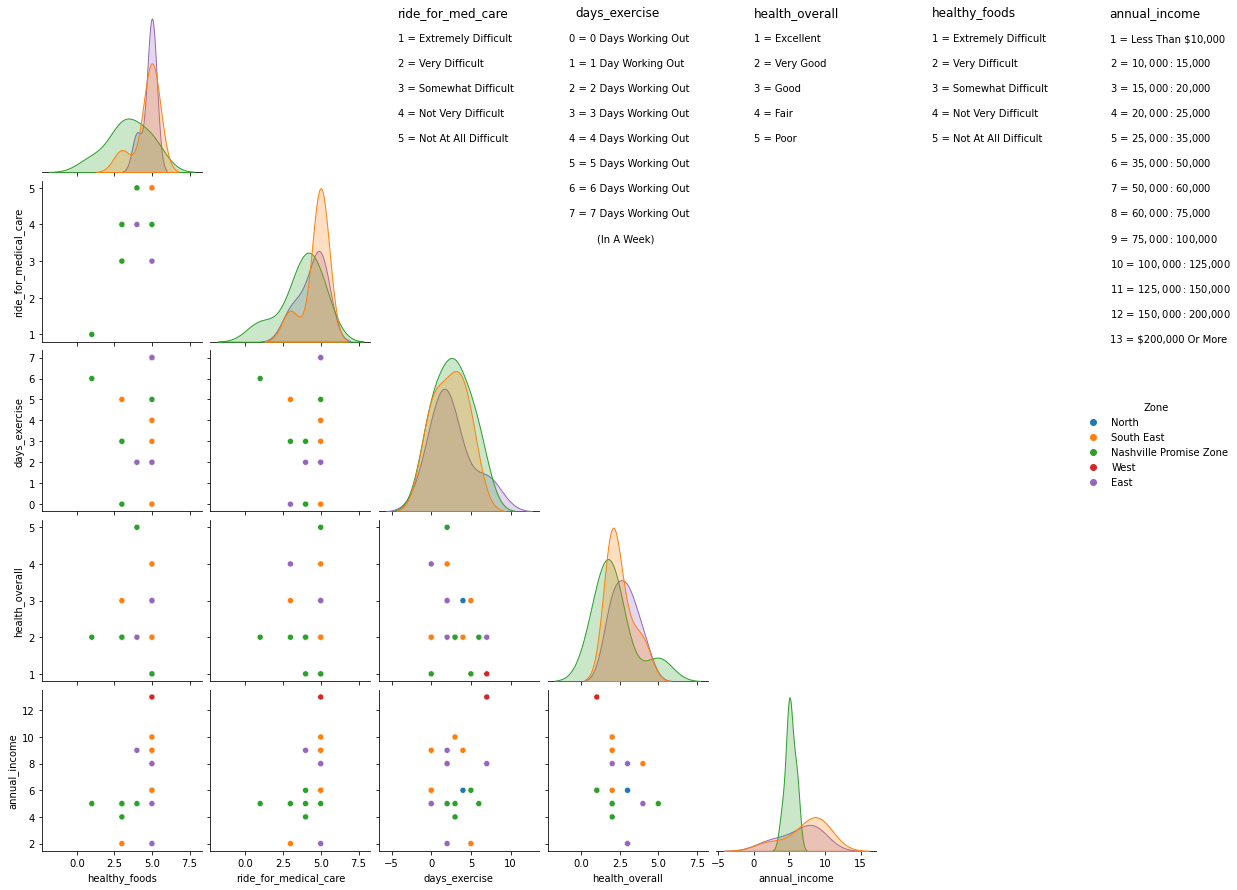

In [ ]:
sns.pairplot(a_new_na_df, hue ="Zone", corner=True)
plt.text(-50, 1, "ride_for_med_care",fontsize = 12)
plt.text(-25, 1, "days_exercise",fontsize = 12)
plt.text(0, 1, "health_overall",fontsize = 12)
plt.text(25, 1, "healthy_foods",fontsize = 12)
plt.text(50, 1, "annual_income",fontsize = 12)
plt.text(-50, .97, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .94, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .91, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .88, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .85, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, .97, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, .94, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, .91, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, .88, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, .85, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, .82, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, .79, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, .76, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, .73, "(In A Week)",fontsize = 10)
plt.text(0, .97, "1 = Excellent",fontsize = 10)
plt.text(0, .94, "2 = Very Good",fontsize = 10)
plt.text(0, .91, "3 = Good",fontsize = 10)
plt.text(0, .88, "4 = Fair",fontsize = 10)
plt.text(0, .85, "5 = Poor",fontsize = 10)
plt.text(25, .97, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .94, "2 = Very Difficult",fontsize = 10)
plt.text(25, .91, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .88, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .85, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .97, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .94, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .91, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .88, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .85, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .82, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .79, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .76, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .73, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .7, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .67, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .64, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .61, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
#####################

In [ ]:
other_race_df

Unnamed: 0                    Zone  CaseID Vlanguage  TYPE_QX  \
16            16              South East  106566   English        2   
26            26              South West  109703   English        1   
95            95                   North  111159   English        2   
117          117  Nashville Promise Zone  110594   English        1   
161          161                    West  105061   English        2   
...          ...                     ...     ...       ...      ...   
1719        1719              South East  107710   Spanish        1   
1758        1758  Nashville Promise Zone  102140   English        1   
1792        1792  Nashville Promise Zone  107302   Spanish        1   
1801        1801              South East  101054   English        1   
1804        1804                    East  102249   English        1   

     DEVICE_SPECIFY  DEVICE smp_ord_STID  var300O1233  var300O1232  ...  \
16              NaN     NaN            1          NaN          NaN  ...   
26              NaN     4.0            3          0.0          0.0  ...   
95              NaN     NaN            2          NaN          NaN  ...   
117      chromebook     5.0            1          1.0          1.0  ...   
161             NaN     NaN            3          NaN          NaN  ...   
...             ...     ...          ...          ...          ...  ...   
1719            NaN     4.0            1          0.0          1.0  ...   
1758            NaN     4.0            1          0.0          1.0  ...   
1792            NaN     2.0            1          0.0          1.0  ...   
1801            NaN     4.0            1          1.0          1.0  ...   
1804            NaN     4.0            2          1.0          0.0  ...   

      About how long has it been since you last visited a doctor for a routine checkup? A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.  \
16                                                  1.0                                                                                                                                           
26                                                  1.0                                                                                                                                           
95                                                  1.0                                                                                                                                           
117                                                 1.0                                                                                                                                           
161                                                 1.0                                                                                                                                           
...                                                 ...                                                                                                                                           
1719                                                5.0                                                                                                                                           
1758                                                1.0                                                                                                                                           
1792                                                1.0                                                                                                                                           
1801                                                1.0                                                                                                                                           
1804                                                5.0                                                    

In [ ]:
other_race_df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'healthy_foods', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
other_race_df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
exercise_g = other_race_df.columns[106]

In [ ]:
other_race_df.rename(columns = {exercise_g: 'days_exercise'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
health_gen_other = other_race_df.columns[205]

In [ ]:
other_race_df.rename(columns = {health_gen_other:'health_overall', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
other_race_df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_other_df = other_race_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income"]]
new_other_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
16              1.0                    2.0            2.0             1.0   
26              5.0                    4.0            7.0             1.0   
95              5.0                    5.0            4.0             3.0   
117             3.0                    4.0            0.0             2.0   
161             5.0                    5.0            2.0             3.0   
...             ...                    ...            ...             ...   
1719            5.0                    5.0            0.0             5.0   
1758            5.0                    5.0            3.0             3.0   
1792            5.0                    5.0            4.0             2.0   
1801            5.0                    5.0            5.0             1.0   
1804            5.0                    4.0            5.0             1.0   

                        Zone  annual_income  
16                South East            NaN  
26                South West            NaN  
95                     North            6.0  
117   Nashville Promise Zone            5.0  
161                     West            4.0  
...                      ...            ...  
1719              South East            1.0  
1758  Nashville Promise Zone            1.0  
1792  Nashville Promise Zone            NaN  
1801              South East            9.0  
1804                    East            1.0  

[65 rows x 6 columns]

In [ ]:
a_new_other_df = new_other_df.dropna()
a_new_other_df

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
95              5.0                    5.0            4.0             3.0   
117             3.0                    4.0            0.0             2.0   
161             5.0                    5.0            2.0             3.0   
256             5.0                    5.0            0.0             4.0   
317             5.0                    5.0            6.0             3.0   
321             5.0                    5.0            2.0             3.0   
333             5.0                    5.0            5.0             1.0   
337             4.0                    5.0            5.0             3.0   
449             5.0                    5.0            3.0             3.0   
450             4.0                    4.0            2.0             3.0   
467             1.0                    1.0            0.0             5.0   
474             5.0                    5.0            5.0             1.0   
480             3.0                    2.0            5.0             4.0   
489             5.0                    4.0            0.0             4.0   
516             5.0                    4.0            1.0             2.0   
520             5.0                    4.0            2.0             3.0   
553             5.0                    5.0            3.0             2.0   
573             5.0                    5.0            1.0             2.0   
587             3.0                    5.0            5.0             2.0   
633             5.0                    5.0            4.0             2.0   
684             3.0                    3.0            1.0             3.0   
711             5.0                    4.0            1.0             4.0   
864             5.0                    5.0            0.0             4.0   
971             5.0                    5.0            7.0             2.0   
1007            4.0                    4.0            2.0             2.0   
1036            5.0                    5.0            7.0             3.0   
1052            4.0                    5.0            5.0             2.0   
1089            5.0                    5.0            3.0             2.0   
1176            5.0                    5.0            4.0             2.0   
1219            5.0                    5.0            7.0             2.0   
1231            5.0                    5.0            2.0             5.0   
1245            5.0                    5.0            2.0             2.0   
1257            4.0                    4.0            4.0             4.0   
1263            5.0                    5.0            0.0             2.0   
1275            5.0                    5.0            5.0             2.0   
1288            4.0                    4.0            5.0             3.0   
1289            5.0                    5.0            3.0             4.0   
1290            4.0                    2.0            0.0             4.0   
1295            5.0                    5.0            1.0             3.0   
1333            5.0                    5.0            6.0             2.0   
1336            4.0                    5.0            0.0             4.0   
1361            5.0                    5.0            0.0             4.0   
1420            5.0                    5.0            3.0             2.0   
1432            5.0                    5.0            2.0             4.0   
1435            4.0                    4.0            3.0             3.0   
1436            5.0                    5.0            0.0             2.0   
1452            5.0                    5.0            0.0             3.0   
1489            5.0                    5.0            2.0             1.0   
1512            5.0                    5.0            3.0             2.0   
1529            5.0                    5.0            6.0             2.0   
1556            4.0                    4.0            3.0             2.0   
16

In [ ]:
corrMatrix_other_df_a = a_new_other_df.corr(method = 'pearson')
print(corrMatrix_other_df_a)

                       healthy_foods  ride_for_medical_care  days_exercise  \
healthy_foods               1.000000               0.790725       0.138829   
ride_for_medical_care       0.790725               1.000000       0.223197   
days_exercise               0.138829               0.223197       1.000000   
health_overall             -0.206811              -0.270552      -0.407739   
annual_income               0.217623               0.359824       0.071466   

                       health_overall  annual_income  
healthy_foods               -0.206811       0.217623  
ride_for_medical_care       -0.270552       0.359824  
days_exercise               -0.407739       0.071466  
health_overall               1.000000      -0.284509  
annual_income               -0.284509       1.000000  


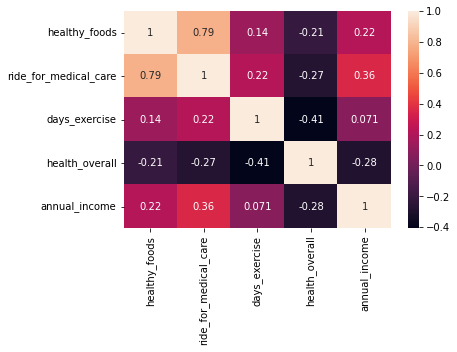

In [ ]:
sns.heatmap(corrMatrix_other_df_a, annot=True)

Text(50, 0.257, '13 = $200,000 Or More')

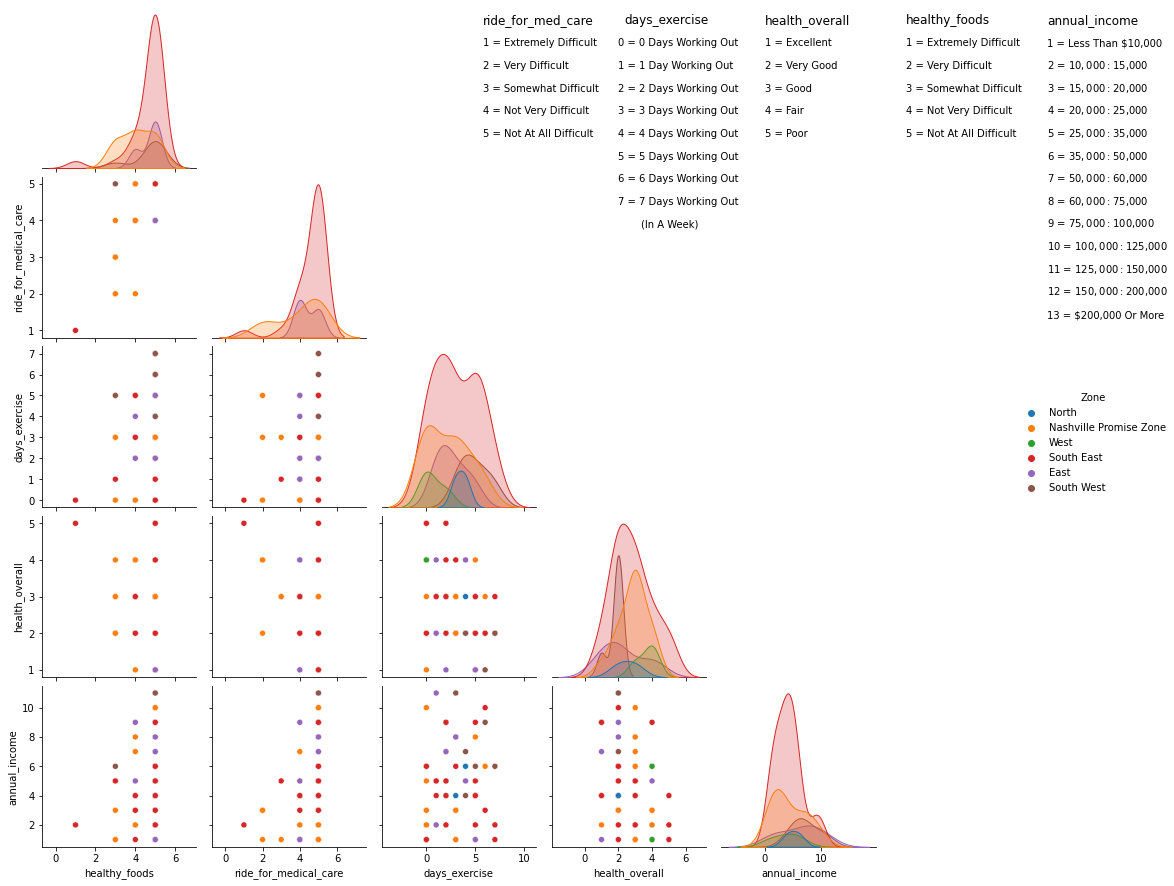

In [ ]:
sns.pairplot(a_new_other_df, hue ="Zone", corner=True)
plt.text(-50, 0.4, "ride_for_med_care",fontsize = 12)
plt.text(-25, 0.4, "days_exercise",fontsize = 12)
plt.text(0, 0.4, "health_overall",fontsize = 12)
plt.text(25, 0.4, "healthy_foods",fontsize = 12)
plt.text(50, 0.4, "annual_income",fontsize = 12)
plt.text(-50, 0.389, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, 0.378, "2 = Very Difficult",fontsize = 10)
plt.text(-50, 0.367, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50,0.356, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50,0.345, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, 0.389, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, 0.378, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, 0.367, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, 0.356, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, 0.345, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, 0.334, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, 0.323, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, 0.312, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, 0.301, "(In A Week)",fontsize = 10)
plt.text(0, 0.389, "1 = Excellent",fontsize = 10)
plt.text(0, 0.378, "2 = Very Good",fontsize = 10)
plt.text(0, 0.367, "3 = Good",fontsize = 10)
plt.text(0, 0.356, "4 = Fair",fontsize = 10)
plt.text(0, 0.345, "5 = Poor",fontsize = 10)
plt.text(25, 0.389, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, 0.378, "2 = Very Difficult",fontsize = 10)
plt.text(25, 0.367, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25,0.356, "4 = Not Very Difficult", fontsize = 10)
plt.text(25,0.345, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, 0.389, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, 0.378, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, 0.367, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, 0.356, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, 0.345, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, 0.334, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50,0.323, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50,0.312, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50,0.301, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50,0.290, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50,0.279, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50,0.268, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50,0.257, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
###############################

In [ ]:
person_has_hyp = hispanic_df.columns[170]

In [ ]:
hispanic_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_hispanic_df = hispanic_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_hispanic_df = b_hispanic_df.dropna()
b_new_hispanic_df["person_has_hyp"].unique()

array([1, 2, 3])

In [ ]:
feature_cols = ['healthy_foods', 'ride_for_medical_care', 'days_exercise', 'health_overall','annual_income']

In [ ]:
X = b_new_hispanic_df[feature_cols] # Features
y = b_new_hispanic_df['person_has_hyp'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X

healthy_foods  ride_for_medical_care  days_exercise  health_overall  \
194             4.0                    5.0            0.0             3.0   
212             5.0                    5.0            1.0             2.0   
226             5.0                    5.0            2.0             3.0   
256             5.0                    5.0            0.0             4.0   
310             5.0                    5.0            3.0             3.0   
...             ...                    ...            ...             ...   
1790            4.0                    5.0            2.0             2.0   
1791            5.0                    5.0            6.0             2.0   
1800            4.0                    5.0            7.0             1.0   
1801            5.0                    5.0            5.0             1.0   
1804            5.0                    4.0            5.0             1.0   

      annual_income  
194             8.0  
212             9.0  
226             5.0  
256             6.0  
310             7.0  
...             ...  
1790            4.0  
1791            4.0  
1800            1.0  
1801            9.0  
1804            1.0  

[104 rows x 5 columns]

In [ ]:
# Create Decision Tree classifer object
hisp_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
hisp_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = hisp_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


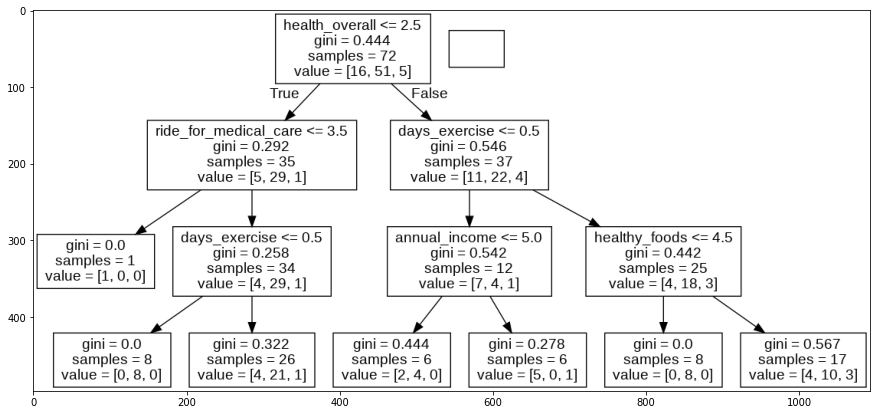

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(hisp_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

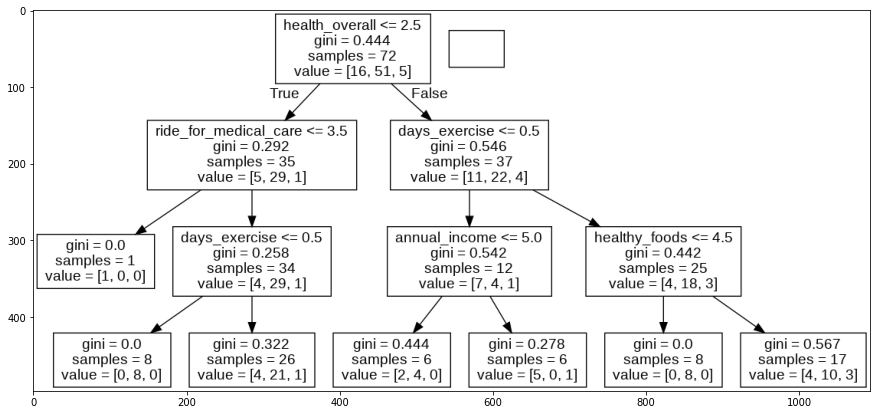

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(hisp_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
hisp_importance = hisp_clf.feature_importances_

<BarContainer object of 5 artists>

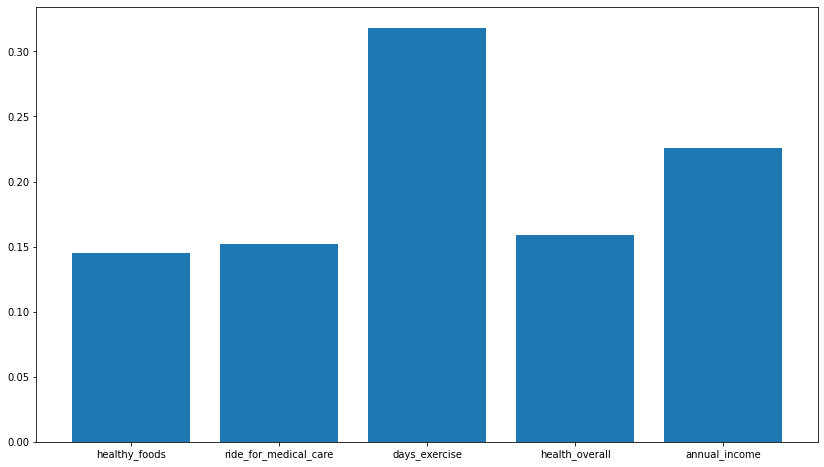

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, hisp_importance)

In [ ]:
###############################

In [ ]:
###############################

In [ ]:
person_has_hyp = white_df.columns[170]

In [ ]:
white_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_white_df = white_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_white_df = b_white_df.dropna()
b_new_white_df["person_has_hyp"].unique()

array([1, 2, 3])

In [ ]:
white_X = b_new_white_df[feature_cols] # Features
white_y = b_new_white_df['person_has_hyp'] # Target variable

In [ ]:
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
white_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
white_clf.fit(white_X_train,white_y_train)

#Predict the response for test dataset
white_y_pred = white_clf.predict(white_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(white_y_test, white_y_pred))

Accuracy: 0.6449704142011834


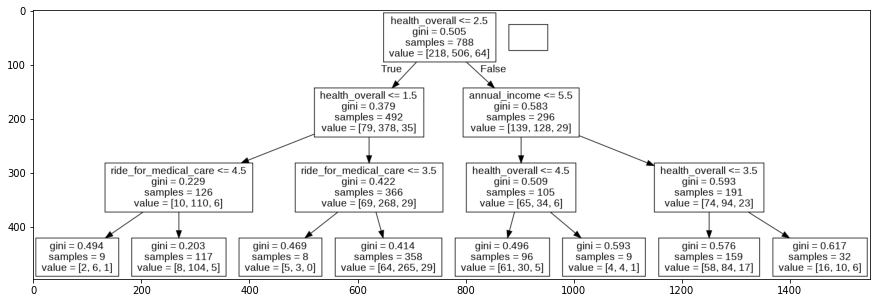

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(white_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
white_importance = white_clf.feature_importances_

<BarContainer object of 5 artists>

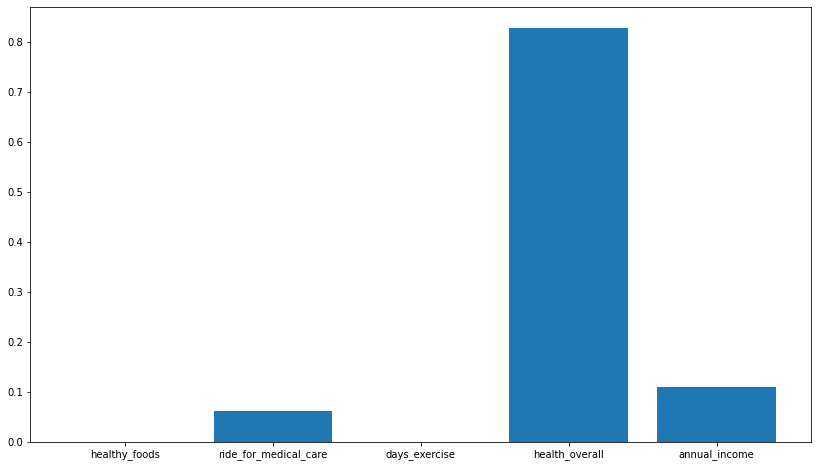

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, white_importance)

In [ ]:
###############################

In [ ]:
person_has_hyp = black_df.columns[170]

In [ ]:
black_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_black_df = black_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_black_df = b_black_df.dropna()
b_new_black_df["person_has_hyp"].unique()

array([1, 2, 3])

In [ ]:
black_X = b_new_black_df[feature_cols] # Features
black_y = b_new_black_df['person_has_hyp'] # Target variable

In [ ]:
black_X_train, black_X_test, black_y_train, black_y_test = train_test_split(black_X, black_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
black_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
black_clf.fit(black_X_train,black_y_train)

#Predict the response for test dataset
black_y_pred = black_clf.predict(black_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(black_y_test, black_y_pred))

Accuracy: 0.504424778761062


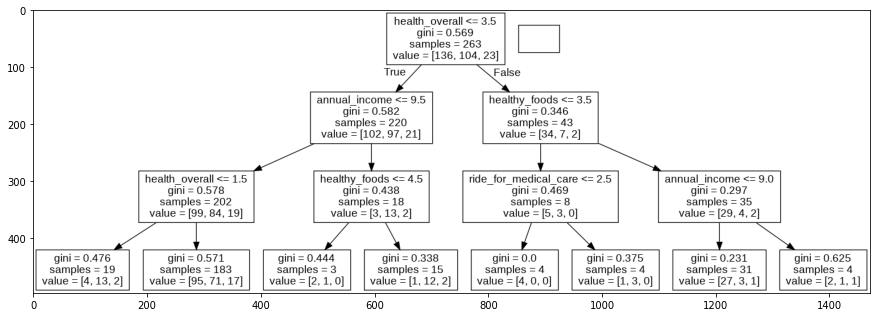

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(black_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
black_importance = black_clf.feature_importances_

<BarContainer object of 5 artists>

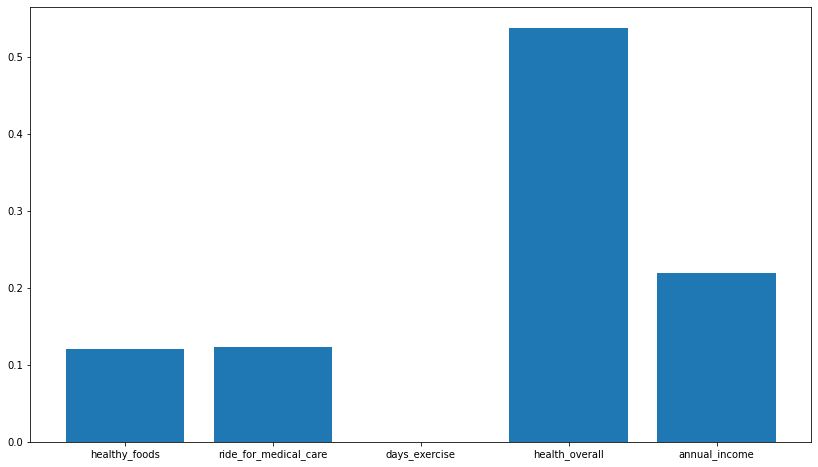

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, black_importance)

In [ ]:
###############################

In [ ]:
person_has_hyp = asian_df.columns[170]

In [ ]:
asian_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_asian_df = asian_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_asian_df = b_asian_df.dropna()
b_new_asian_df["person_has_hyp"].unique()

array([2, 1, 3])

In [ ]:
asian_X = b_new_asian_df[feature_cols] # Features
asian_y = b_new_asian_df['person_has_hyp'] # Target variable

In [ ]:
asian_X_train, asian_X_test, asian_y_train, asian_y_test = train_test_split(asian_X, asian_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
asian_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
asian_clf.fit(asian_X_train,asian_y_train)

#Predict the response for test dataset
asian_y_pred = asian_clf.predict(asian_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(asian_y_test, asian_y_pred))

Accuracy: 0.42857142857142855


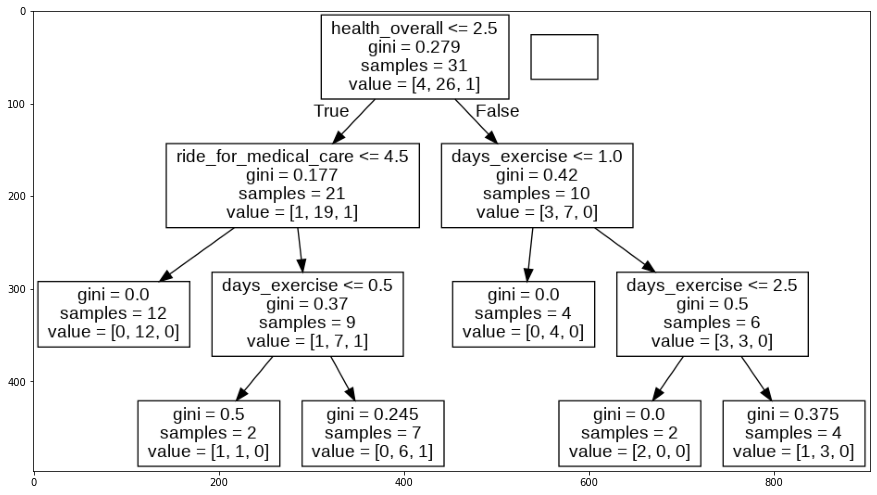

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(asian_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
asian_importance = asian_clf.feature_importances_

<BarContainer object of 5 artists>

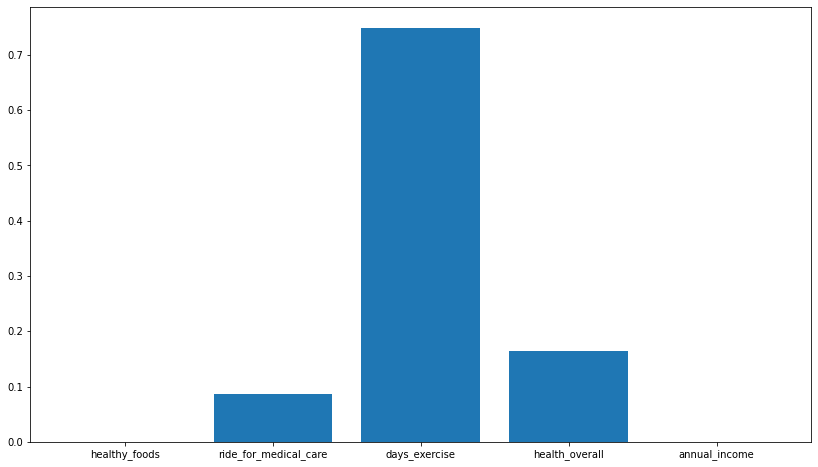

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, asian_importance)

In [ ]:
###############################

In [ ]:
person_has_hyp = pacific_islander_df.columns[170]

In [ ]:
pacific_islander_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_pi_df = pacific_islander_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_pi_df = b_pi_df.dropna()
b_new_pi_df["person_has_hyp"].unique()

array([2, 1])

In [ ]:
pi_X = b_new_pi_df[feature_cols] # Features
pi_y = b_new_pi_df['person_has_hyp'] # Target variable

In [ ]:
pi_X_train, pi_X_test, pi_y_train, pi_y_test = train_test_split(pi_X, pi_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
pi_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
pi_clf.fit(pi_X_train,pi_y_train)

#Predict the response for test dataset
pi_y_pred = pi_clf.predict(pi_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(pi_y_test, pi_y_pred))

Accuracy: 1.0


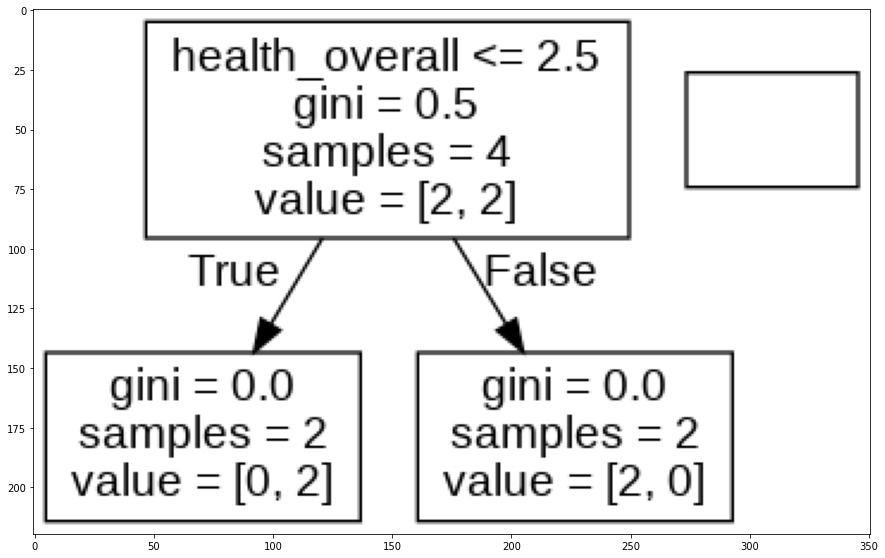

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(pi_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
pi_importance = pi_clf.feature_importances_

<BarContainer object of 5 artists>

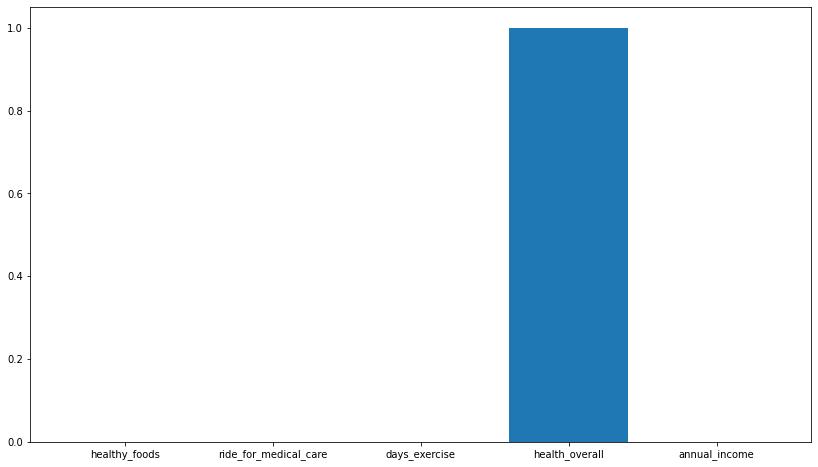

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, pi_importance)

In [ ]:
###############################

In [ ]:
person_has_hyp = native_american_df.columns[170]

In [ ]:
native_american_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_na_df = pacific_islander_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_na_df = b_na_df.dropna()
b_new_na_df["person_has_hyp"].unique()

array([2, 1])

In [ ]:
na_X = b_new_na_df[feature_cols] # Features
na_y = b_new_na_df['person_has_hyp'] # Target variable

In [ ]:
na_X_train, na_X_test, na_y_train, na_y_test = train_test_split(na_X, na_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
na_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
na_clf.fit(na_X_train,na_y_train)

#Predict the response for test dataset
na_y_pred = na_clf.predict(na_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(na_y_test, na_y_pred))

Accuracy: 1.0


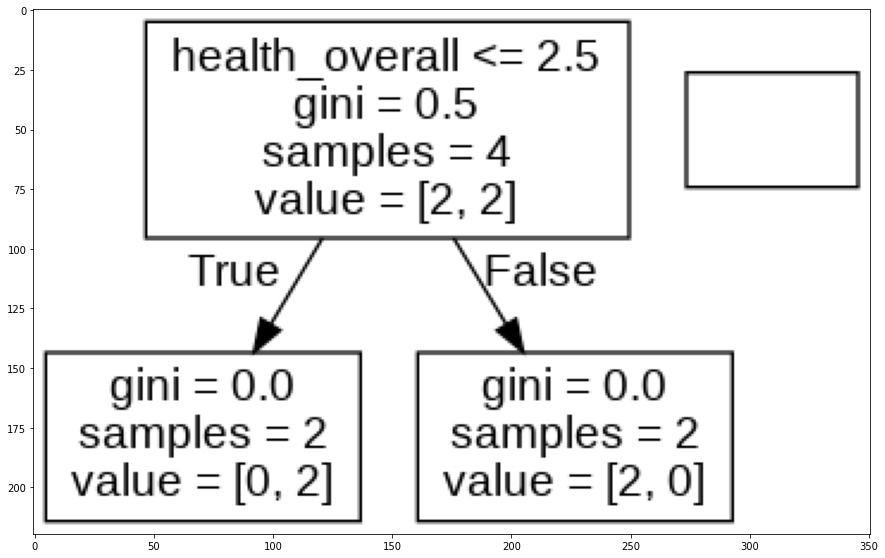

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(na_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
na_importance = na_clf.feature_importances_

<BarContainer object of 5 artists>

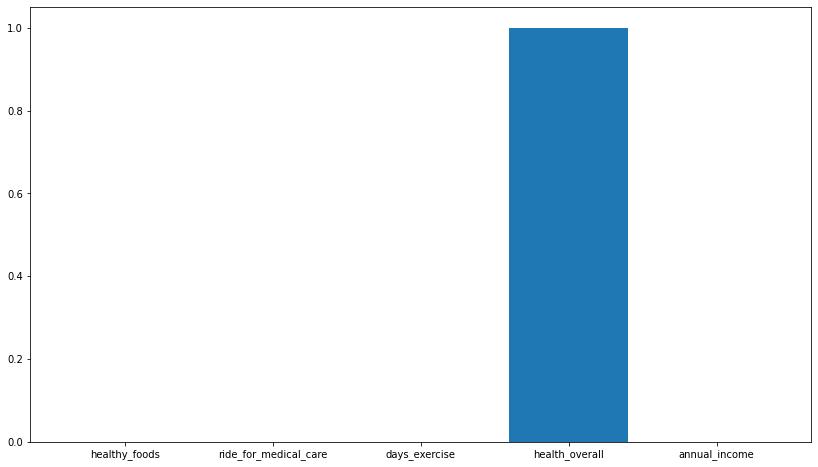

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, na_importance)

In [ ]:
###############################

In [ ]:
person_has_hyp = other_race_df.columns[170]

In [ ]:
other_race_df.rename(columns = {person_has_hyp:'person_has_hyp', }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
b_other_df = other_race_df[["healthy_foods", "ride_for_medical_care", "days_exercise", "health_overall", "Zone", "annual_income", "person_has_hyp"]]

In [ ]:
b_new_other_df = b_other_df.dropna()
b_new_other_df["person_has_hyp"].unique()

array([1, 2, 3])

In [ ]:
other_X = b_new_other_df[feature_cols] # Features
other_y = b_new_other_df['person_has_hyp'] # Target variable

In [ ]:
other_X_train, other_X_test, other_y_train, other_y_test = train_test_split(other_X, other_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
other_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
other_clf.fit(other_X_train,other_y_train)

#Predict the response for test dataset
other_y_pred = other_clf.predict(other_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(other_y_test, other_y_pred))

Accuracy: 0.3888888888888889


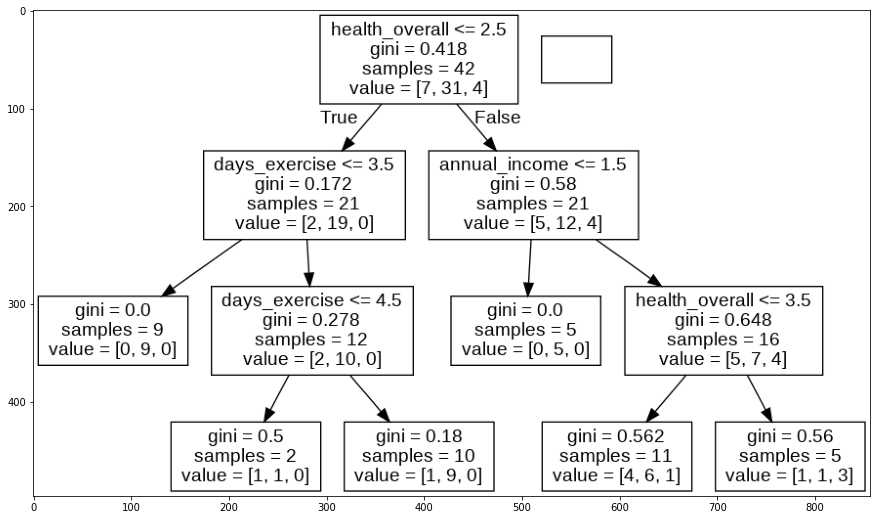

In [ ]:
plt_2 = plt.figure(figsize=(15, 15))
data = tree.export_graphviz(other_clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
other_importance = other_clf.feature_importances_

<BarContainer object of 5 artists>

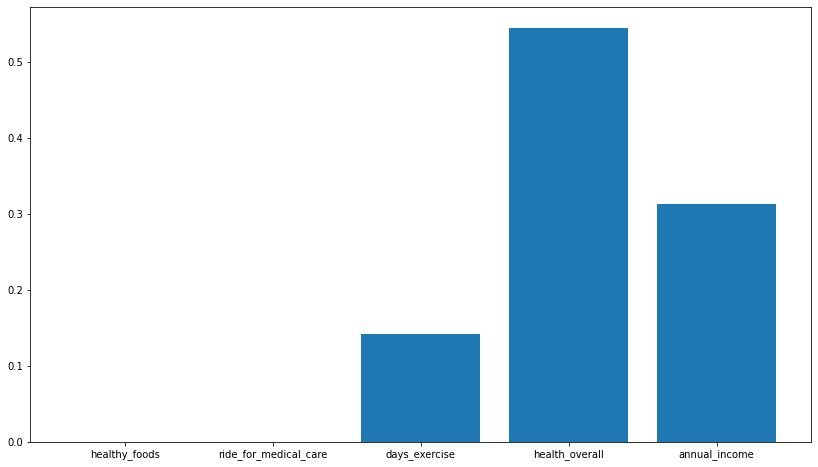

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(feature_cols, other_importance)

In [ ]:
###############################

In [ ]:
###############################

In [ ]:
###############################

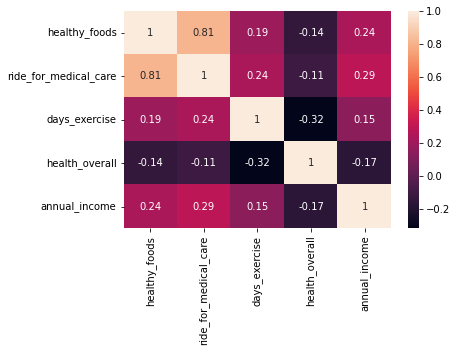

In [ ]:
sns.heatmap(corrMatrix_hispanic_df_a, annot=True)

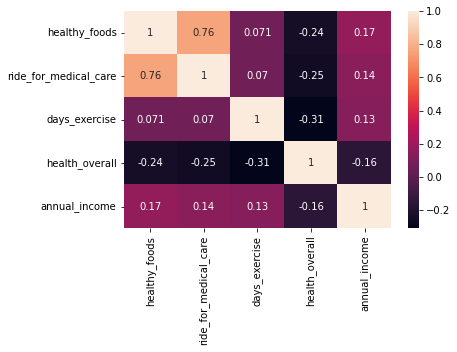

In [ ]:
sns.heatmap(corrMatrix_white_df_a, annot=True)

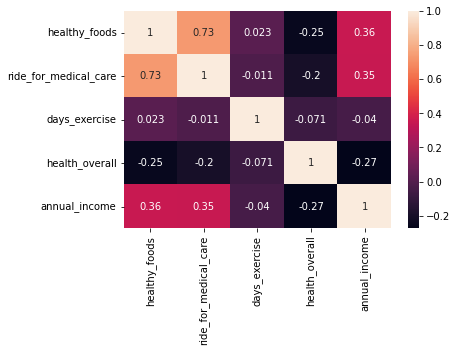

In [ ]:
sns.heatmap(corrMatrix_black_df_a, annot=True)

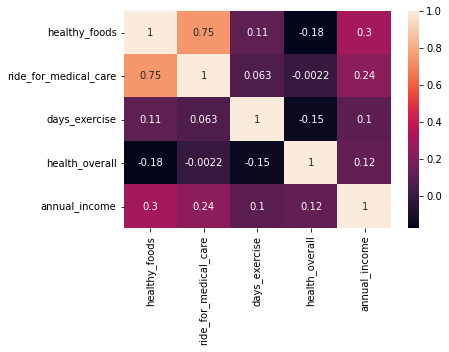

In [ ]:
sns.heatmap(corrMatrix_asian_df_a, annot=True)

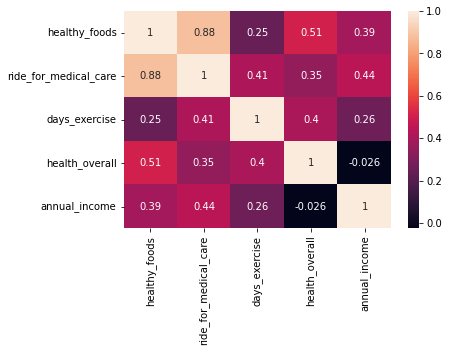

In [ ]:
sns.heatmap(corrMatrix_pi_df_a, annot=True)

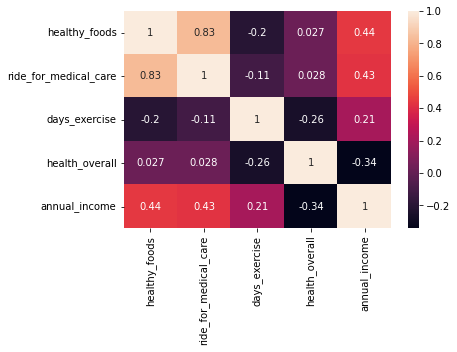

In [ ]:
sns.heatmap(corrMatrix_na_df_a, annot=True)

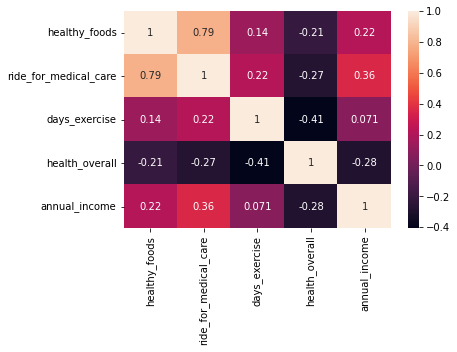

In [ ]:
sns.heatmap(corrMatrix_other_df_a, annot=True)

In [ ]:
##########################

Text(50, 0.27, '13 = $200,000 Or More')

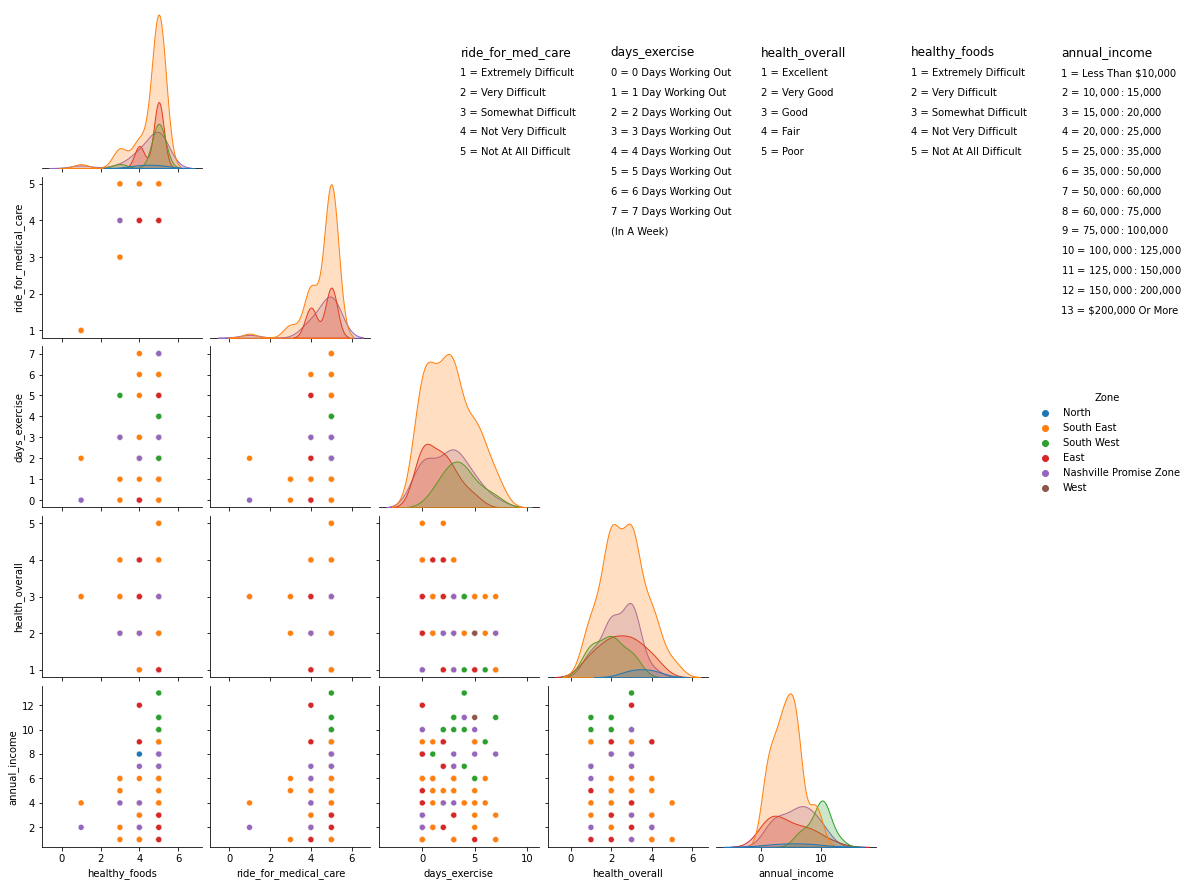

In [ ]:
sns.pairplot(a_new_hispanic_df, hue ="Zone", corner=True)
plt.text(-50, .4, "ride_for_med_care",fontsize = 12)
plt.text(-25, .4, "days_exercise",fontsize = 12)
plt.text(0, .4, "health_overall",fontsize = 12)
plt.text(25, .4, "healthy_foods",fontsize = 12)
plt.text(50, .4, "annual_income",fontsize = 12)
plt.text(-50, .39, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .38, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .37, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .36, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .35, "5 = Not At All Difficult", fontsize = 10)
plt.text(-25, .39, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-25, .38, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-25, .37, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-25, .36, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-25, .35, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-25, .34, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-25, .33, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-25, .32, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-25, .31, "(In A Week)",fontsize = 10)
plt.text(0, .39, "1 = Excellent",fontsize = 10)
plt.text(0, .38, "2 = Very Good",fontsize = 10)
plt.text(0, .37, "3 = Good",fontsize = 10)
plt.text(0, .36, "4 = Fair",fontsize = 10)
plt.text(0, .35, "5 = Poor",fontsize = 10)
plt.text(25, .39, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .38, "2 = Very Difficult",fontsize = 10)
plt.text(25, .37, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .36, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .35, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .39, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .38, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .37, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .36, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .35, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .34, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .33, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .32, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .31, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .3, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .29, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .28, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .27, "13 = $200,000 Or More", fontsize = 10)

Text(300, 0.115, '13 = $200,000 Or More')

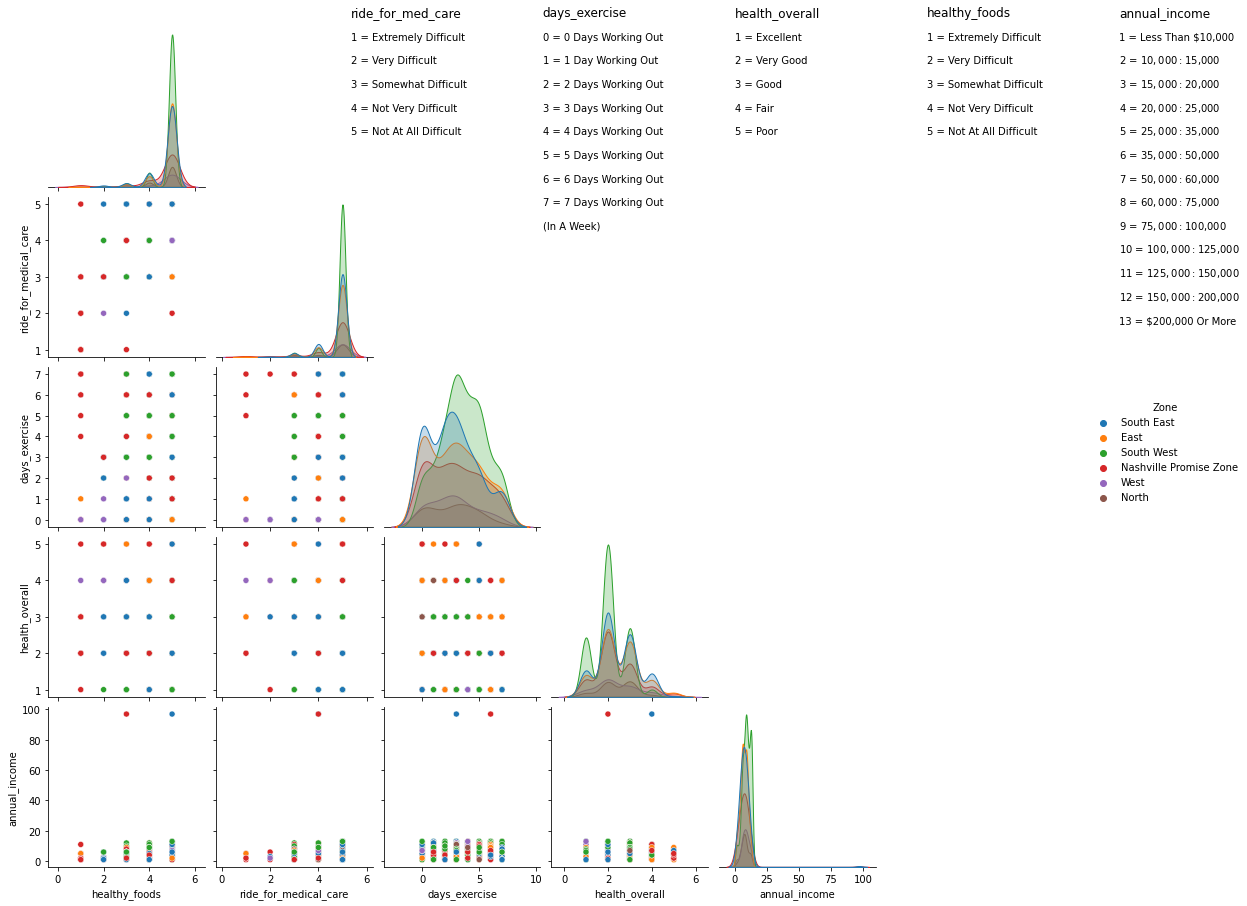

In [ ]:
sns.pairplot(a_new_white_df, hue ="Zone", corner=True)
plt.text(-300, .18, "ride_for_med_care",fontsize = 12)
plt.text(-150, .18, "days_exercise",fontsize = 12)
plt.text(0, .18, "health_overall",fontsize = 12)
plt.text(150, .18, "healthy_foods",fontsize = 12)
plt.text(300, .18, "annual_income",fontsize = 12)
plt.text(-300, .175, "1 = Extremely Difficult",fontsize = 10)
plt.text(-300, .17, "2 = Very Difficult",fontsize = 10)
plt.text(-300, .165, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-300, .16, "4 = Not Very Difficult", fontsize = 10)
plt.text(-300, .155, "5 = Not At All Difficult", fontsize = 10)
plt.text(-150, .175, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-150, .17, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-150, .165, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-150, .16, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-150, .155, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-150, .15, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-150, .145, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-150, .14, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-150, .135, "(In A Week)",fontsize = 10)
plt.text(0, .175, "1 = Excellent",fontsize = 10)
plt.text(0, .17, "2 = Very Good",fontsize = 10)
plt.text(0, .165, "3 = Good",fontsize = 10)
plt.text(0, .16, "4 = Fair",fontsize = 10)
plt.text(0, .155, "5 = Poor",fontsize = 10)
plt.text(150, .175, "1 = Extremely Difficult",fontsize = 10)
plt.text(150, .17, "2 = Very Difficult",fontsize = 10)
plt.text(150, .165, "3 = Somewhat Difficult", fontsize = 10)
plt.text(150, .16, "4 = Not Very Difficult", fontsize = 10)
plt.text(150, .155, "5 = Not At All Difficult", fontsize = 10)
plt.text(300, .175, "1 = Less Than $10,000",fontsize = 10)
plt.text(300, .17, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(300, .165, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(300, .16, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(300, .155, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(300, .15, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(300, .145, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(300, .14, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(300, .135, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(300, .13, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(300, .125, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(300, .12, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(300, .115, "13 = $200,000 Or More", fontsize = 10)

Text(60, 0.185, '13 = $200,000 Or More')

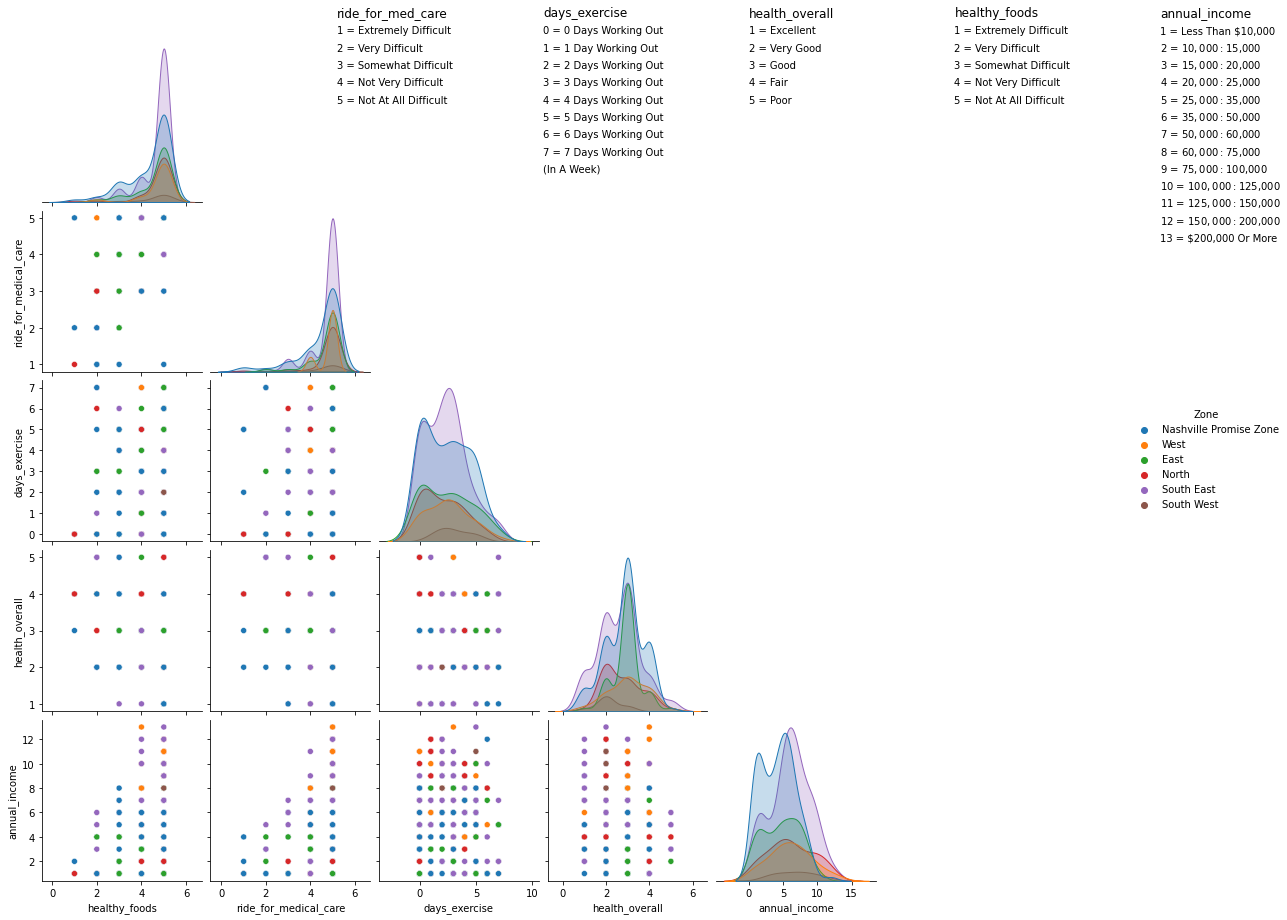

In [ ]:
sns.pairplot(a_new_black_df, hue ="Zone", corner=True)
plt.text(-60, .25, "ride_for_med_care",fontsize = 12)
plt.text(-30, .25, "days_exercise",fontsize = 12)
plt.text(0, .25, "health_overall",fontsize = 12)
plt.text(30, .25, "healthy_foods",fontsize = 12)
plt.text(60, .25, "annual_income",fontsize = 12)
plt.text(-60, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(-60, .24, "2 = Very Difficult",fontsize = 10)
plt.text(-60, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-60, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(-60, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(-30, .245, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-30, .24, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-30, .235, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-30, .23, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-30, .225, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-30, .22, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-30, .215, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-30, .21, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-30, .205, "(In A Week)",fontsize = 10)
plt.text(0, .245, "1 = Excellent",fontsize = 10)
plt.text(0, .24, "2 = Very Good",fontsize = 10)
plt.text(0, .235, "3 = Good",fontsize = 10)
plt.text(0, .23, "4 = Fair",fontsize = 10)
plt.text(0, .225, "5 = Poor",fontsize = 10)
plt.text(30, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(30, .24, "2 = Very Difficult",fontsize = 10)
plt.text(30, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(30, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(30, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(60, .245, "1 = Less Than $10,000",fontsize = 10)
plt.text(60, .24, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(60, .235, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(60, .23, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(60, .225, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(60, .22, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(60, .215, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(60, .21, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(60, .205, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(60, .20, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(60, .195, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(60, .19, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(60, .185, "13 = $200,000 Or More", fontsize = 10)

Text(60, 0.185, '13 = $200,000 Or More')

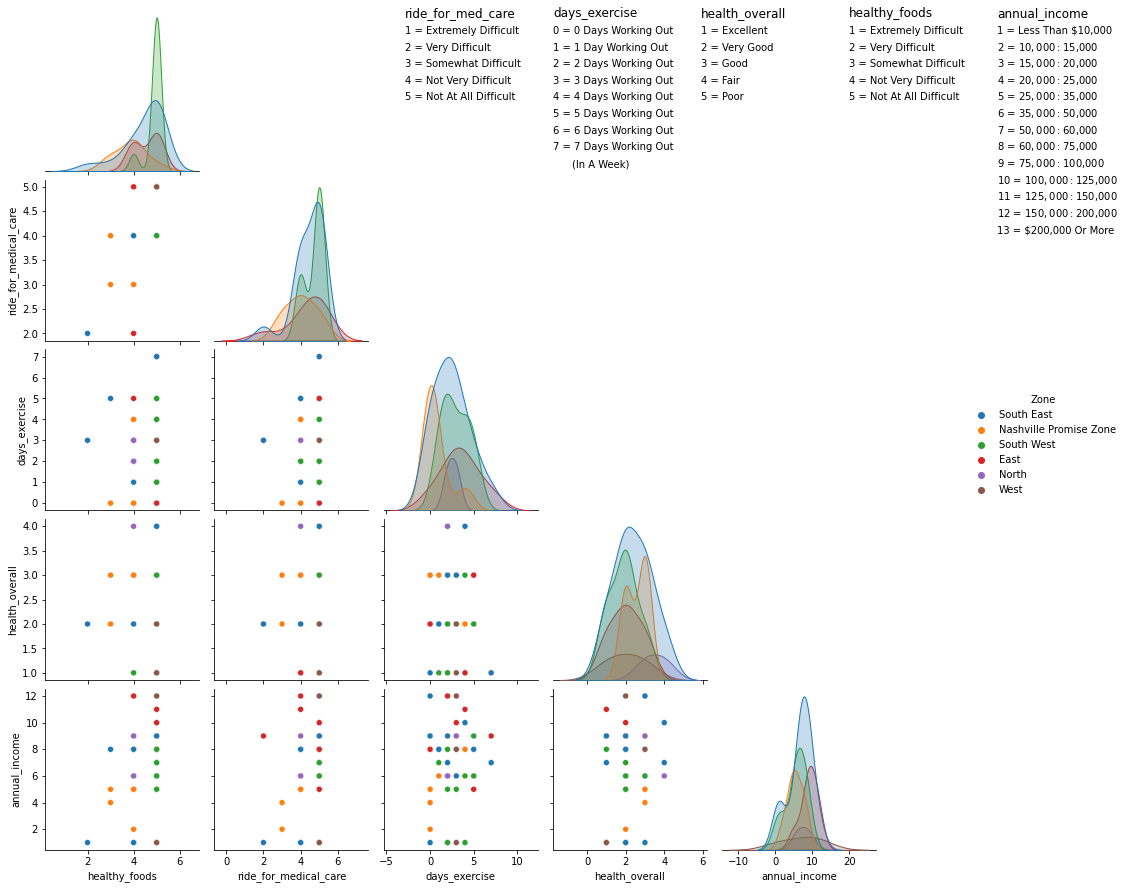

In [ ]:
sns.pairplot(a_new_asian_df, hue ="Zone", corner=True)
plt.text(-100, .25, "ride_for_med_care",fontsize = 12)
plt.text(-60, .25, "days_exercise",fontsize = 12)
plt.text(-20, .25, "health_overall",fontsize = 12)
plt.text(20, .25, "healthy_foods",fontsize = 12)
plt.text(60, .25, "annual_income",fontsize = 12)
plt.text(-100, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(-100, .24, "2 = Very Difficult",fontsize = 10)
plt.text(-100, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-100, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(-100, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(-60, .245, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-60, .24, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-60, .235, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-60, .23, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-60, .225, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-60, .22, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-60, .215, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-60, .21, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-55, .205, "(In A Week)",fontsize = 10)
plt.text(-20, .245, "1 = Excellent",fontsize = 10)
plt.text(-20, .24, "2 = Very Good",fontsize = 10)
plt.text(-20, .235, "3 = Good",fontsize = 10)
plt.text(-20, .23, "4 = Fair",fontsize = 10)
plt.text(-20, .225, "5 = Poor",fontsize = 10)
plt.text(20, .245, "1 = Extremely Difficult",fontsize = 10)
plt.text(20, .24, "2 = Very Difficult",fontsize = 10)
plt.text(20, .235, "3 = Somewhat Difficult", fontsize = 10)
plt.text(20, .23, "4 = Not Very Difficult", fontsize = 10)
plt.text(20, .225, "5 = Not At All Difficult", fontsize = 10)
plt.text(60, .245, "1 = Less Than $10,000",fontsize = 10)
plt.text(60, .24, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(60, .235, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(60, .23, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(60, .225, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(60, .22, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(60, .215, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(60, .21, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(60, .205, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(60, .20, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(60, .195, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(60, .19, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(60, .185, "13 = $200,000 Or More", fontsize = 10)

Text(50, 0.305, '13 = $200,000 Or More')

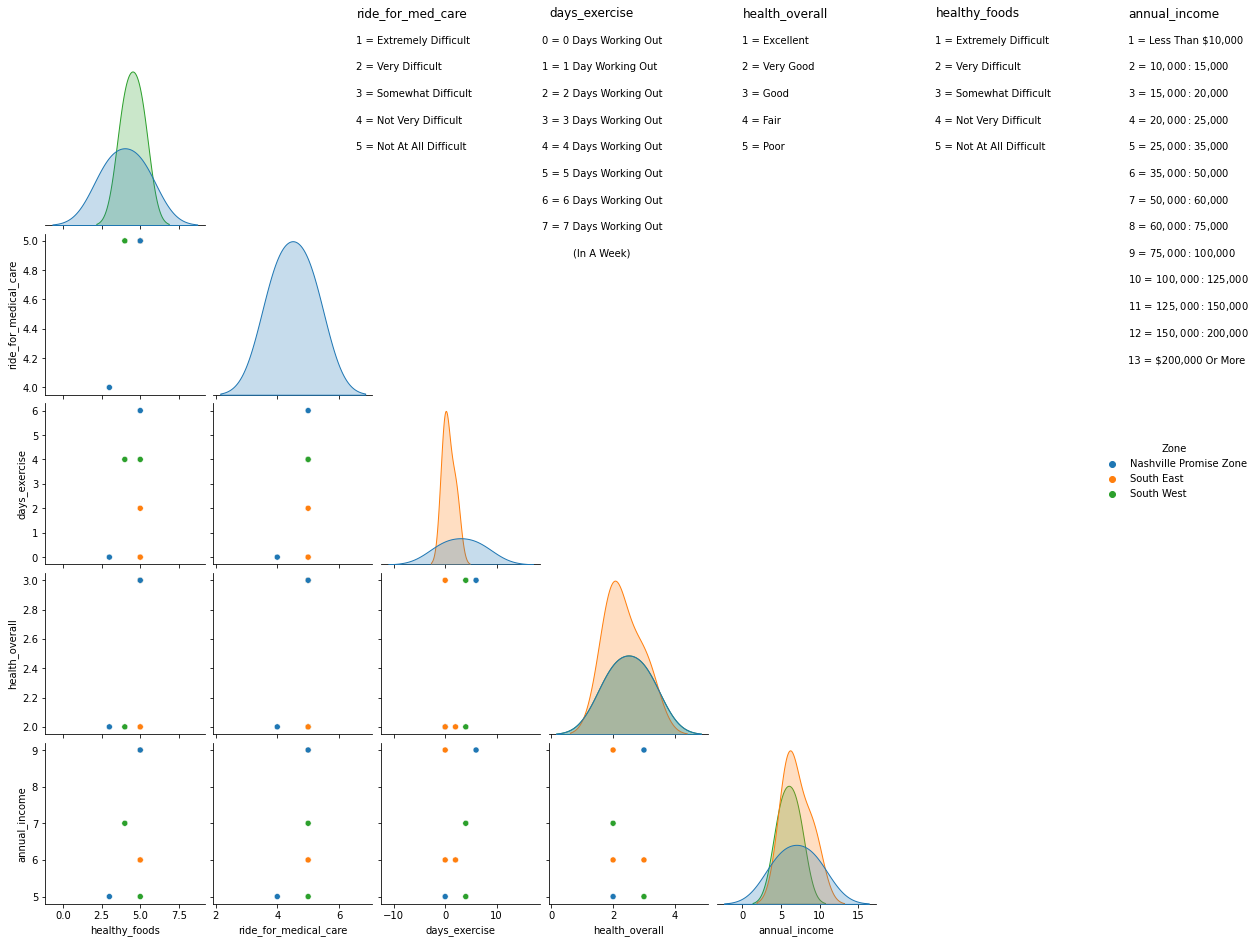

In [ ]:
sns.pairplot(new_pi_df, hue ="Zone", corner=True)
plt.text(-50, .5, "ride_for_med_care",fontsize = 12)
plt.text(-25, .5, "days_exercise",fontsize = 12)
plt.text(0, .5, "health_overall",fontsize = 12)
plt.text(25, .5, "healthy_foods",fontsize = 12)
plt.text(50, .5, "annual_income",fontsize = 12)
plt.text(-50, .485, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .47, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .455, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .44, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .425, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, .485, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, .47, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, .455, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, .44, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, .425, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, .41, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, .395, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, .38, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, .365, "(In A Week)",fontsize = 10)
plt.text(0, .485, "1 = Excellent",fontsize = 10)
plt.text(0, .47, "2 = Very Good",fontsize = 10)
plt.text(0, .455, "3 = Good",fontsize = 10)
plt.text(0, .44, "4 = Fair",fontsize = 10)
plt.text(0, .425, "5 = Poor",fontsize = 10)
plt.text(25, .485, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .47, "2 = Very Difficult",fontsize = 10)
plt.text(25, .455, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .44, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .425, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .485, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .47, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .455, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .44, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .425, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .41, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .395, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .38, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .365, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .35, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .335, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .32, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .305, "13 = $200,000 Or More", fontsize = 10)

Text(50, 0.61, '13 = $200,000 Or More')

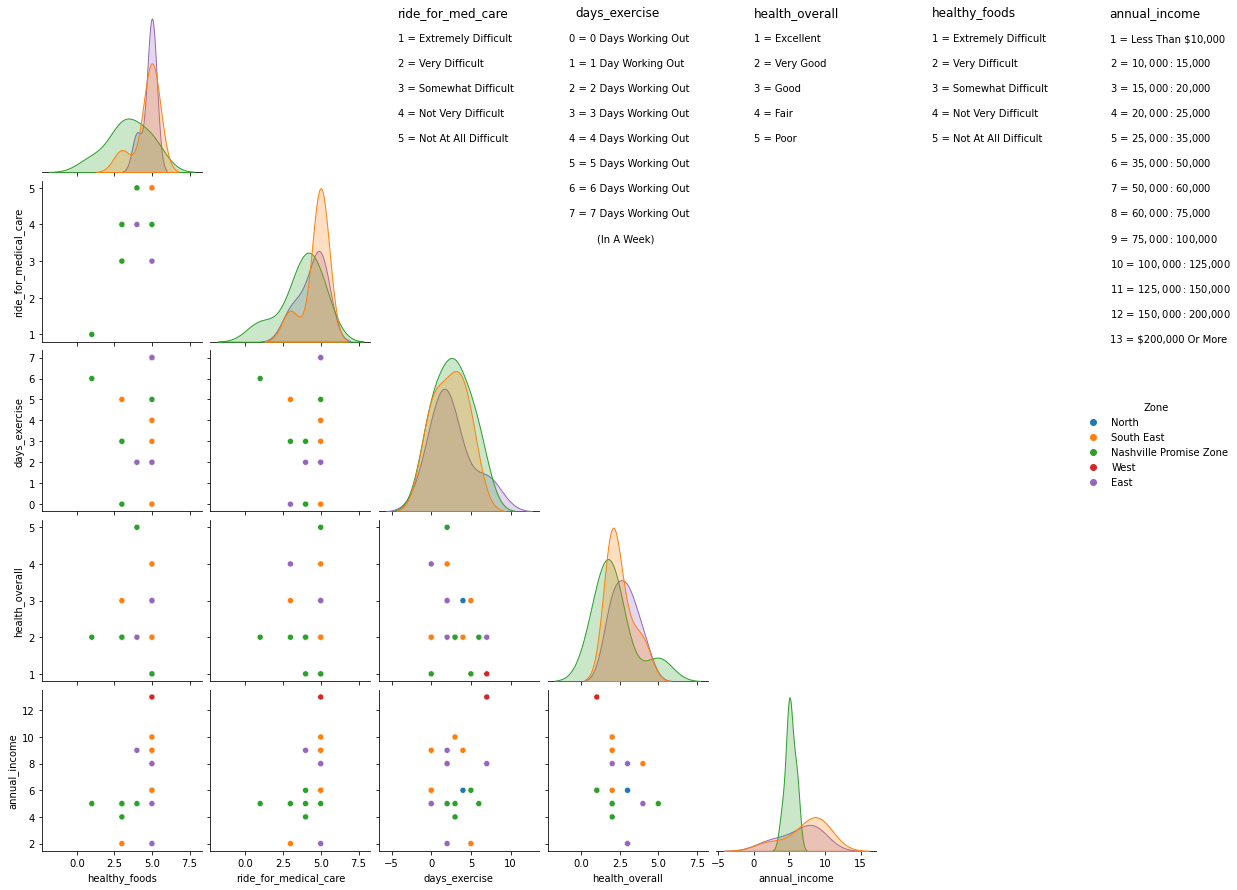

In [ ]:
sns.pairplot(a_new_na_df, hue ="Zone", corner=True)
plt.text(-50, 1, "ride_for_med_care",fontsize = 12)
plt.text(-25, 1, "days_exercise",fontsize = 12)
plt.text(0, 1, "health_overall",fontsize = 12)
plt.text(25, 1, "healthy_foods",fontsize = 12)
plt.text(50, 1, "annual_income",fontsize = 12)
plt.text(-50, .97, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, .94, "2 = Very Difficult",fontsize = 10)
plt.text(-50, .91, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50, .88, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50, .85, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, .97, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, .94, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, .91, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, .88, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, .85, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, .82, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, .79, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, .76, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, .73, "(In A Week)",fontsize = 10)
plt.text(0, .97, "1 = Excellent",fontsize = 10)
plt.text(0, .94, "2 = Very Good",fontsize = 10)
plt.text(0, .91, "3 = Good",fontsize = 10)
plt.text(0, .88, "4 = Fair",fontsize = 10)
plt.text(0, .85, "5 = Poor",fontsize = 10)
plt.text(25, .97, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, .94, "2 = Very Difficult",fontsize = 10)
plt.text(25, .91, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25, .88, "4 = Not Very Difficult", fontsize = 10)
plt.text(25, .85, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, .97, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, .94, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, .91, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, .88, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, .85, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, .82, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50, .79, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50, .76, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50, .73, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50, .7, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50, .67, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50, .64, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50, .61, "13 = $200,000 Or More", fontsize = 10)

Text(50, 0.257, '13 = $200,000 Or More')

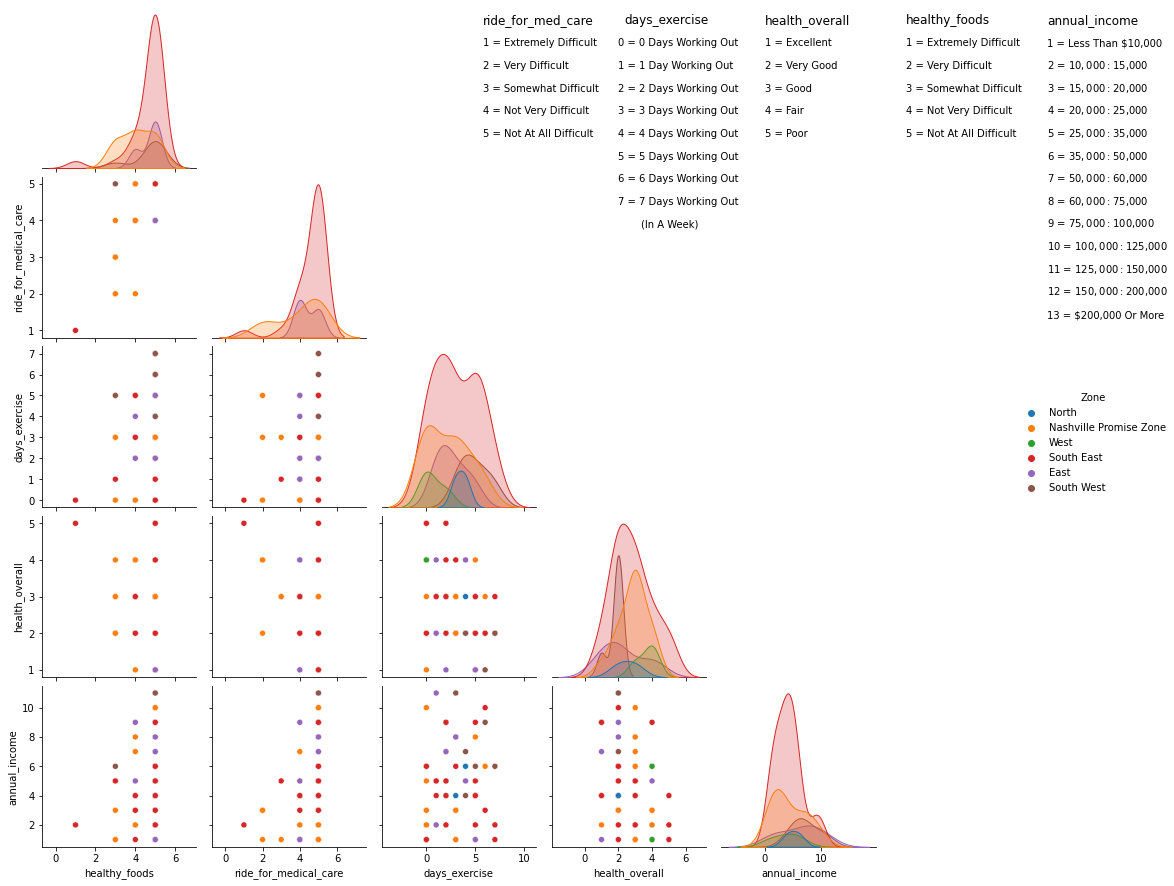

In [ ]:
sns.pairplot(a_new_other_df, hue ="Zone", corner=True)
plt.text(-50, 0.4, "ride_for_med_care",fontsize = 12)
plt.text(-25, 0.4, "days_exercise",fontsize = 12)
plt.text(0, 0.4, "health_overall",fontsize = 12)
plt.text(25, 0.4, "healthy_foods",fontsize = 12)
plt.text(50, 0.4, "annual_income",fontsize = 12)
plt.text(-50, 0.389, "1 = Extremely Difficult",fontsize = 10)
plt.text(-50, 0.378, "2 = Very Difficult",fontsize = 10)
plt.text(-50, 0.367, "3 = Somewhat Difficult", fontsize = 10)
plt.text(-50,0.356, "4 = Not Very Difficult", fontsize = 10)
plt.text(-50,0.345, "5 = Not At All Difficult", fontsize = 10)
plt.text(-26, 0.389, "0 = 0 Days Working Out",fontsize = 10)
plt.text(-26, 0.378, "1 = 1 Day Working Out",fontsize = 10)
plt.text(-26, 0.367, "2 = 2 Days Working Out",fontsize = 10)
plt.text(-26, 0.356, "3 = 3 Days Working Out",fontsize = 10)
plt.text(-26, 0.345, "4 = 4 Days Working Out",fontsize = 10)
plt.text(-26, 0.334, "5 = 5 Days Working Out",fontsize = 10)
plt.text(-26, 0.323, "6 = 6 Days Working Out",fontsize = 10)
plt.text(-26, 0.312, "7 = 7 Days Working Out",fontsize = 10)
plt.text(-22, 0.301, "(In A Week)",fontsize = 10)
plt.text(0, 0.389, "1 = Excellent",fontsize = 10)
plt.text(0, 0.378, "2 = Very Good",fontsize = 10)
plt.text(0, 0.367, "3 = Good",fontsize = 10)
plt.text(0, 0.356, "4 = Fair",fontsize = 10)
plt.text(0, 0.345, "5 = Poor",fontsize = 10)
plt.text(25, 0.389, "1 = Extremely Difficult",fontsize = 10)
plt.text(25, 0.378, "2 = Very Difficult",fontsize = 10)
plt.text(25, 0.367, "3 = Somewhat Difficult", fontsize = 10)
plt.text(25,0.356, "4 = Not Very Difficult", fontsize = 10)
plt.text(25,0.345, "5 = Not At All Difficult", fontsize = 10)
plt.text(50, 0.389, "1 = Less Than $10,000",fontsize = 10)
plt.text(50, 0.378, "2 = $10,000 : $15,000",fontsize = 10)
plt.text(50, 0.367, "3 = $15,000 : $20,000", fontsize = 10)
plt.text(50, 0.356, "4 = $20,000 : $25,000", fontsize = 10)
plt.text(50, 0.345, "5 = $25,000 : $35,000", fontsize = 10)
plt.text(50, 0.334, "6 = $35,000 : $50,000", fontsize = 10)
plt.text(50,0.323, "7 = $50,000 : $60,000", fontsize = 10)
plt.text(50,0.312, "8 = $60,000 : $75,000", fontsize = 10)
plt.text(50,0.301, "9 = $75,000 : $100,000", fontsize = 10)
plt.text(50,0.290, "10 = $100,000 : $125,000", fontsize = 10)
plt.text(50,0.279, "11 = $125,000 : $150,000", fontsize = 10)
plt.text(50,0.268, "12 = $150,000 : $200,000", fontsize = 10)
plt.text(50,0.257, "13 = $200,000 Or More", fontsize = 10)

In [ ]:
###########################

In [ ]:
df.rename(columns = {'How difficult is it for you to get transportation to a store that sells healthy food, such as fresh fruits and vegetables? ':'ride_to_healthy_foods', }, inplace = True)

In [ ]:
df.rename(columns = {'How difficult is it for you to get transportation to your medical care, including doctor, dentist, or pharmacy? ':'ride_for_medical_care', }, inplace = True)

In [ ]:
exercise_f = df.columns[106]

In [ ]:
df.rename(columns = {exercise_f: 'days_exercise'}, inplace = True)

In [ ]:
health_gen_all = df.columns[205]

In [ ]:
df.rename(columns = {health_gen_na:'health_overall', }, inplace = True)

In [ ]:
df.rename(columns = {'Is your annual household income from all sources: ':'annual_income', }, inplace = True)

In [ ]:
new_df = df[["ride_to_healthy_foods", "ride_for_medical_care", "Zone", "days_exercise", "health_overall", "annual_income"]]

In [ ]:
a_new_df = new_df.dropna()

In [ ]:
a_new_df

ride_to_healthy_foods  ride_for_medical_care        Zone  days_exercise  \
8                       4.0                    4.0  South East            2.0   
33                      5.0                    5.0        East            0.0   
43                      5.0                    5.0  South West            5.0   
46                      3.0                    3.0  South West            6.0   
48                      5.0                    5.0  South East            3.0   
...                     ...                    ...         ...            ...   
1800                    4.0                    5.0  South East            7.0   
1801                    5.0                    5.0  South East            5.0   
1802                    2.0                    5.0  South East            2.0   
1803                    4.0                    5.0  South East            2.0   
1804                    5.0                    4.0        East            5.0   

      health_overall  annual_income  
8                3.0            3.0  
33               3.0            6.0  
43               3.0            7.0  
46               3.0           12.0  
48               2.0            6.0  
...              ...            ...  
1800             1.0            1.0  
1801             1.0            9.0  
1802             2.0            1.0  
1803             3.0           12.0  
1804             1.0            1.0  

[1611 rows x 6 columns]

In [ ]:
corrMatrix_df_a = a_new_df.corr(method = 'pearson')
print(corrMatrix_df_a)

                       ride_to_healthy_foods  ride_for_medical_care  \
ride_to_healthy_foods               1.000000               0.760436   
ride_for_medical_care               0.760436               1.000000   
days_exercise                       0.067052               0.063431   
health_overall                     -0.256147              -0.243135   
annual_income                       0.226377               0.210514   

                       days_exercise  health_overall  annual_income  
ride_to_healthy_foods       0.067052       -0.256147       0.226377  
ride_for_medical_care       0.063431       -0.243135       0.210514  
days_exercise               1.000000       -0.277995       0.128370  
health_overall             -0.277995        1.000000      -0.215874  
annual_income               0.128370       -0.215874       1.000000  


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

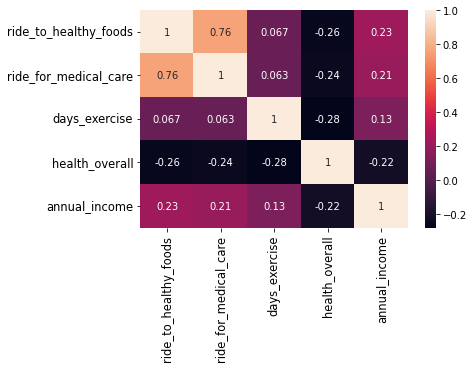

In [ ]:
sns.heatmap(corrMatrix_df_a, annot=True)
plt.xticks(fontsize = 11.5)
plt.yticks(fontsize = 11.5)

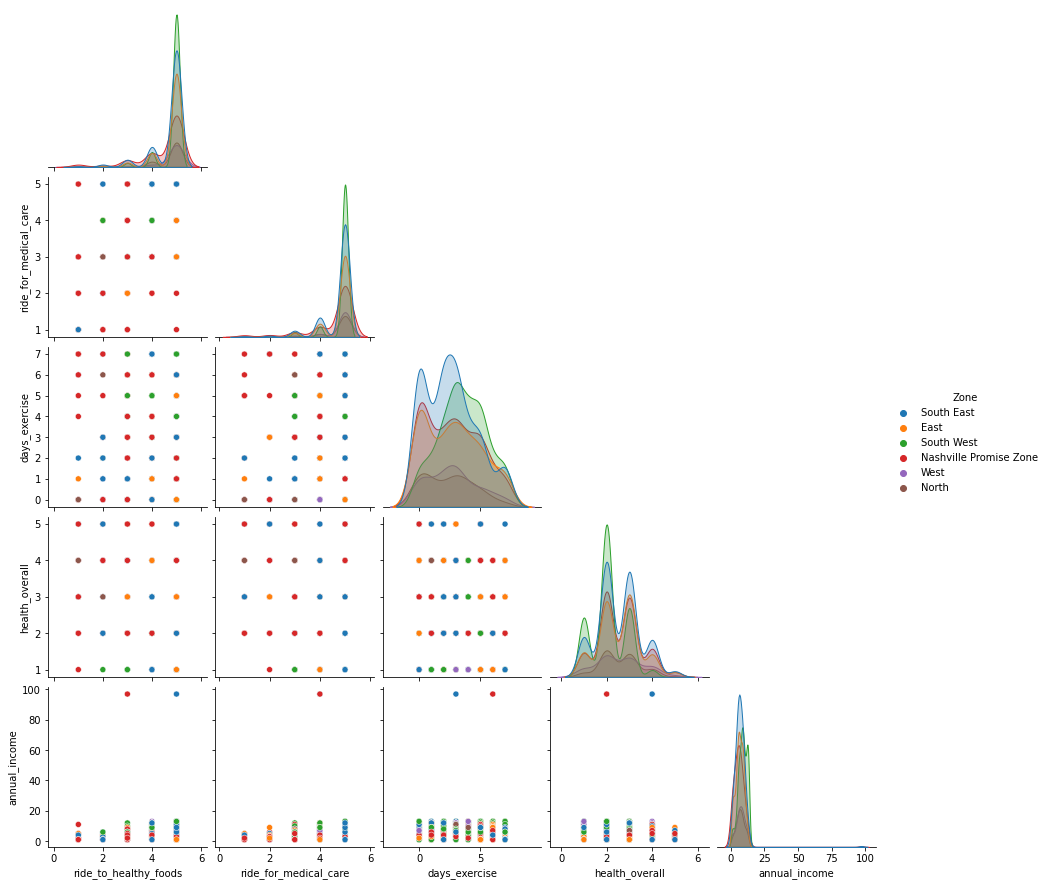

In [ ]:
sns.pairplot(a_new_df, hue ="Zone", corner=True)
